In [52]:
# Importing Libraries and reading in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

df = pd.read_csv('gun-violence-data.csv')

print(df.shape)
# dropping columns
df.drop(columns=['incident_id','date','state','city_or_county','address',
                 'participant_relationship','gun_stolen','gun_type',
                 'incident_url_fields_missing','location_description',
                 'congressional_district','latitude','longitude',
                 'sources','state_house_district','state_senate_district', 
                 'notes','participant_name','participant_age',
                 'source_url','incident_url','participant_status',
                 'participant_type'],
                  inplace=True)

pd.set_option('display.max_columns',109)
pd.set_option('display.max_rows',109)

(239677, 29)


In [2]:
# Finding NaNs
print(df.isna().sum()/len(df))
print(df.isna().sum())
df.shape

n_killed                    0.000000
n_injured                   0.000000
incident_characteristics    0.001360
n_guns_involved             0.414938
participant_age_group       0.175732
participant_gender          0.151713
dtype: float64
n_killed                        0
n_injured                       0
incident_characteristics      326
n_guns_involved             99451
participant_age_group       42119
participant_gender          36362
dtype: int64


(239677, 6)

In [3]:
# Dropping NaNs
idx=~df['participant_age_group'].isna()
df=df[idx]
idx2=~df['participant_gender'].isna()
df=df[idx2]
idx3=~df['incident_characteristics'].isna()
df=df[idx3]
idx4=~df['n_guns_involved'].isna()
df=df[idx4]


print(df.isna().sum())

n_killed                    0
n_injured                   0
incident_characteristics    0
n_guns_involved             0
participant_age_group       0
participant_gender          0
dtype: int64


In [4]:
df

n_killed  n_injured  \
2              1          3   
4              2          2   
6              5          0   
10             1          3   
11             1          3   
...          ...        ...   
239672         0          0   
239673         1          0   
239674         0          1   
239675         1          0   
239676         2          0   

                                 incident_characteristics  n_guns_involved  \
2       Shot - Wounded/Injured||Shot - Dead (murder, a...              2.0   
4       Shot - Wounded/Injured||Shot - Dead (murder, a...              2.0   
6       Shot - Dead (murder, accidental, suicide)||Mas...              2.0   
10      Shot - Wounded/Injured||Shot - Dead (murder, a...              1.0   
11      Shot - Wounded/Injured||Shot - Dead (murder, a...              1.0   
...                                                   ...              ...   
239672                          Shots Fired - No Injuries              1.0   
239673  Shot - Dead (murder, accidental, suicide)||Ins...              1.0   
239674                             Shot - Wounded/Injured              1.0   
239675          Shot - Dead (murder, accidental, suicide)              1.0   
239676  Shot - Dead (murder, accidental, suicide)||Sui...              2.0   

                                    participant_age_group  \
2       0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4       0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   
6       0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...   
10                                           0::Adult 18+   
11                                           0::Adult 18+   
...                                                   ...   
239672                                       0::Adult 18+   
239673                         0::Adult 18+||1::Adult 18+   
239674                                       0::Adult 18+   
239675                                       0::Adult 18+   
239676                         0::Adult 18+||1::Adult 18+   

                                       participant_gender  
2             0::Male||1::Male||2::Male||3::Male||4::Male  
4                  0::Female||1::Male||2::Male||3::Female  
6       0::Male||1::Female||2::Male||3::Female||4::Fem...  
10                     0::Male||1::Male||2::Male||3::Male  
11                                                0::Male  
...                                                   ...  
239672                                          0::Female  
239673                                   0::Male||1::Male  
239674                                            0::Male  
239675                                            0::Male  
239676                                 0::Female||1::Male  

[112657 rows x 6 columns]

In [5]:
# Split Function
def split_fun(x):
    di={}                                               # Creating empty dictionary
    x=x.replace('||','|')                               # Replacing || with |
    x=x.replace('::',':')                               # Replacing :: with :
    temp_bar=x.split('|')                               # Splitting on |
    for bar in temp_bar:                                # looping through | 
        li=bar.split(':')                               # Splitting on :
        di.update({int(li[0]):li[1].split(', ')})       # Creating a dictionary with entries  ***** why split on ','
    return(di)


In [6]:
# Applying split function to necessary columns
df['participant_gender']=df['participant_gender'].apply(split_fun) 
df['participant_age_group']=df['participant_age_group'].apply(split_fun)


df

n_killed  n_injured  \
2              1          3   
4              2          2   
6              5          0   
10             1          3   
11             1          3   
...          ...        ...   
239672         0          0   
239673         1          0   
239674         0          1   
239675         1          0   
239676         2          0   

                                 incident_characteristics  n_guns_involved  \
2       Shot - Wounded/Injured||Shot - Dead (murder, a...              2.0   
4       Shot - Wounded/Injured||Shot - Dead (murder, a...              2.0   
6       Shot - Dead (murder, accidental, suicide)||Mas...              2.0   
10      Shot - Wounded/Injured||Shot - Dead (murder, a...              1.0   
11      Shot - Wounded/Injured||Shot - Dead (murder, a...              1.0   
...                                                   ...              ...   
239672                          Shots Fired - No Injuries              1.0   
239673  Shot - Dead (murder, accidental, suicide)||Ins...              1.0   
239674                             Shot - Wounded/Injured              1.0   
239675          Shot - Dead (murder, accidental, suicide)              1.0   
239676  Shot - Dead (murder, accidental, suicide)||Sui...              2.0   

                                    participant_age_group  \
2       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Adul...   
4       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Teen...   
6       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Chil...   
10                                     {0: ['Adult 18+']}   
11                                     {0: ['Adult 18+']}   
...                                                   ...   
239672                                 {0: ['Adult 18+']}   
239673               {0: ['Adult 18+'], 1: ['Adult 18+']}   
239674                                 {0: ['Adult 18+']}   
239675                                 {0: ['Adult 18+']}   
239676               {0: ['Adult 18+'], 1: ['Adult 18+']}   

                                       participant_gender  
2       {0: ['Male'], 1: ['Male'], 2: ['Male'], 3: ['M...  
4       {0: ['Female'], 1: ['Male'], 2: ['Male'], 3: [...  
6       {0: ['Male'], 1: ['Female'], 2: ['Male'], 3: [...  
10      {0: ['Male'], 1: ['Male'], 2: ['Male'], 3: ['M...  
11                                          {0: ['Male']}  
...                                                   ...  
239672                                    {0: ['Female']}  
239673                         {0: ['Male'], 1: ['Male']}  
239674                                      {0: ['Male']}  
239675                                      {0: ['Male']}  
239676                       {0: ['Female'], 1: ['Male']}  

[112657 rows x 6 columns]

In [7]:
# Split Function 2    *** needed a different split for incident characteristics
def new_split_fun(x):               
    x=x.replace('||','|')              # Replacing || with |
    temp_bar=x.split('|')              # Splitting on |
    return set(temp_bar)

# Applying split function to incident characteristics
df['incident_characteristics']=df['incident_characteristics'].apply(new_split_fun)

In [8]:
# Creating a function to check if length of each entry of each column is equal
def col_eq(x):
    par_gen=len(x['participant_gender'])                    # length of participant_gender
    par_age_gp=len(x['participant_age_group'])              # length of participant_age_group
    
    return par_gen==par_age_gp            

idx0=df.apply(col_eq,axis=1)                                # Creating index of columns who's length is equal, applying it element by element to columns                            
df=df[idx0]                                                 # Applying index to df                             
df                                                          # df now has entires in each column that are equal

n_killed  n_injured  \
2              1          3   
4              2          2   
6              5          0   
11             1          3   
12             2          3   
...          ...        ...   
239672         0          0   
239673         1          0   
239674         0          1   
239675         1          0   
239676         2          0   

                                 incident_characteristics  n_guns_involved  \
2       {Bar/club incident - in or around establishmen...              2.0   
4       {Suicide^, Attempted Murder/Suicide (one varia...              2.0   
6       {Domestic Violence, Shot - Dead (murder, accid...              2.0   
11      {Gang involvement, Drive-by (car to street, ca...              1.0   
12      {Officer Involved Shooting - Officer killed, H...              1.0   
...                                                   ...              ...   
239672                        {Shots Fired - No Injuries}              1.0   
239673  {Institution/Group/Business, Shot - Dead (murd...              1.0   
239674                           {Shot - Wounded/Injured}              1.0   
239675        {Shot - Dead (murder, accidental, suicide)}              1.0   
239676  {Murder/Suicide, Suicide^, Shot - Dead (murder...              2.0   

                                    participant_age_group  \
2       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Adul...   
4       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Teen...   
6       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Chil...   
11                                     {0: ['Adult 18+']}   
12      {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Adul...   
...                                                   ...   
239672                                 {0: ['Adult 18+']}   
239673               {0: ['Adult 18+'], 1: ['Adult 18+']}   
239674                                 {0: ['Adult 18+']}   
239675                                 {0: ['Adult 18+']}   
239676               {0: ['Adult 18+'], 1: ['Adult 18+']}   

                                       participant_gender  
2       {0: ['Male'], 1: ['Male'], 2: ['Male'], 3: ['M...  
4       {0: ['Female'], 1: ['Male'], 2: ['Male'], 3: [...  
6       {0: ['Male'], 1: ['Female'], 2: ['Male'], 3: [...  
11                                          {0: ['Male']}  
12      {0: ['Male'], 1: ['Male'], 2: ['Male'], 3: ['M...  
...                                                   ...  
239672                                    {0: ['Female']}  
239673                         {0: ['Male'], 1: ['Male']}  
239674                                      {0: ['Male']}  
239675                                      {0: ['Male']}  
239676                       {0: ['Female'], 1: ['Male']}  

[102721 rows x 6 columns]

In [9]:
# Creating target and training set
target=df['incident_characteristics']
train=df.drop(columns=['incident_characteristics'])
train.reset_index(drop=True,inplace=True)
target.reset_index(drop=True,inplace=True)
target

0         {Bar/club incident - in or around establishmen...
1         {Suicide^, Attempted Murder/Suicide (one varia...
2         {Domestic Violence, Shot - Dead (murder, accid...
3         {Gang involvement, Drive-by (car to street, ca...
4         {Officer Involved Shooting - Officer killed, H...
                                ...                        
102716                          {Shots Fired - No Injuries}
102717    {Institution/Group/Business, Shot - Dead (murd...
102718                             {Shot - Wounded/Injured}
102719          {Shot - Dead (murder, accidental, suicide)}
102720    {Murder/Suicide, Suicide^, Shot - Dead (murder...
Name: incident_characteristics, Length: 102721, dtype: object

In [ ]:
########################################
####### Creating Training CSV ##########
########################################
#****** Only need to run once **********
# This will make One Hot Encoding Doable

participant_df=pd.DataFrame()                                      # Creating empty dataframe                     
participant_id=0                                                   # Initiating participant id at 0

with open('participants.csv', 'w') as csv_file:                    # Creating a csv file and writing into it
    writer = csv.writer(csv_file)                                  
    columns = ['participant_id', 'incident_id',
               'status', 'gender', 'type', 'age_group']            # Creating column names
    writer.writerow(columns)                                       # Adding column names to csv file
    
    for inc_id,row in train.iterrows():
        num_participants=len(row.participant_status) # this gives me keys
        for key in range(num_participants):
            part_status=train.iloc[inc_id].participant_status[key]
            part_gender=train.iloc[inc_id].participant_gender[key]
            part_type=train.iloc[inc_id].participant_type[key]
            part_age_group=train.iloc[inc_id].participant_age_group[key]
            row = [participant_id, inc_id, part_status, part_gender, part_type, part_age_group]
            writer.writerow(row)
            participant_id+=1
        



In [ ]:
participant_df = pd.read_csv('participants.csv')
participant_df

In [10]:
# Creating list of all characteristics
characteristics=[]
for row in target:
    characteristics += row      # .extend works similar to .append

characteristics=set(characteristics)
print(len(characteristics))
characteristics

109


{'ATF/LE Confiscation/Raid/Arrest',
 'Accidental Shooting',
 'Accidental Shooting - Death',
 'Accidental Shooting - Injury',
 'Accidental Shooting at a Business',
 'Accidental/Negligent Discharge',
 'Animal shot/killed',
 'Armed robbery with injury/death and/or evidence of DGU found',
 'Assault weapon (AR-15, AK-47, and ALL variants defined by law enforcement)',
 'Attempted Murder/Suicide (one variable unsuccessful)',
 'BB/Pellet/Replica gun',
 'Bar/club incident - in or around establishment',
 'Brandishing/flourishing/open carry/lost/found',
 'Car-jacking',
 'Child Involved Incident',
 'Child injured (not child shooter)',
 'Child injured by child',
 'Child injured self',
 'Child killed (not child shooter)',
 'Child killed by child',
 'Child killed self',
 'Child picked up & fired gun',
 'Child with gun - no shots fired',
 'Cleaning gun',
 'Concealed Carry License - Perpetrator',
 'Concealed Carry License - Victim',
 'Criminal act with stolen gun',
 'Defensive Use',
 'Defensive Use - C

In [11]:
# Creating functions I will use to clean up data

def drop_list(inc_chars, drop_char):
    for char in drop_char:
        inc_chars.discard(char)
    return inc_chars


def search_mask(inc_char,search_li):
    mask=True
    for char in search_li:
        mask &= char in inc_char
    return mask

def ignore_mask(inc_char,ignore_char):
    mask=True
    for char in ignore_char:
        mask &= char not in inc_char
    return mask

def combine_new(inc_char,com_char,new_label):
    for char in com_char:
         if char in inc_char:
            inc_char.discard(char)
            inc_char.add(new_label)    
    return inc_char

def num_char(inc_char):
    return len(inc_char)

def add_chars(inc_char,label):
    inc_char.add(label)
    return inc_char

In [12]:
# Before data clean-up frequency matrix
char_list = list(characteristics)

freq_mtx=np.zeros((len(characteristics), len(characteristics)),dtype=np.int32)

for char in characteristics:
    for row in target:
        if char in row:
            for el in row:
                freq_mtx[char_list.index(char), char_list.index(el)] +=1            

freq_df=pd.DataFrame(freq_mtx)

di = {i: char for i,char in enumerate(char_list)}
freq_df.index=char_list
freq_df.rename(columns=di,inplace=True)

freq_df

Workplace shooting (disgruntled employee)  \
Workplace shooting (disgruntled employee)                                                 120   
Shot - Wounded/Injured                                                                     41   
Child injured (not child shooter)                                                           0   
Under the influence of alcohol or drugs (only a...                                          4   
Defensive Use - Victim stops crime                                                          3   
Attempted Murder/Suicide (one variable unsucces...                                          7   
BB/Pellet/Replica gun                                                                       2   
Road rage                                                                                   0   
LOCKDOWN/ALERT ONLY: No GV Incident Occurred On...                                          8   
School Shooting - elementary/secondary school                                               0   
ShotSpotter                                                                                 0   
Shot - Dead (murder, accidental, suicide)                                                  69   
Gang involvement                                                                            0   
Gun at school, no death/injury - elementary/sec...                                          0   
Defensive Use - Good Samaritan/Third Party                                                  4   
Mass Shooting (4+ victims injured or killed exc...                                          6   
Home Invasion - subject/suspect/perpetrator killed                                          0   
Terrorism Involvement                                                                       0   
Gun buy back action                                                                         0   
Gun(s) stolen from owner                                                                    0   
Police Targeted                                                                             2   
TSA Action                                                                                  0   
Car-jacking                                                                                 1   
Possession (gun(s) found during commission of o...                                          7   
Gun shop robbery or burglary                                                                0   
Officer Involved Shooting - subject/suspect/per...                                          0   
Defensive Use - WITHOUT a gun                                                               5   
Home Invasion - Resident injured                                                            0   
Hunting accident                                                                            0   
Shots Fired - No Injuries                                                                  17   
Defensive Use                                                                              12   
Child injured self                                                                          0   
Political Violence                                                                          0   
Criminal act with stolen gun                                                                1   
Domestic Violence                                                                           3   
Cleaning gun                                                                                0   
House party                                                                                 0   
Playing with gun                                                                            0   
Accidental/Negligent Discharge                                                              0   
Spree Shooting (multiple victims, multiple loca...                                          1   
Bar/club incident - in or around establishment                             

In [13]:
char_drop_list=['Child Involved Incident',
                'Child injured (not child shooter)',
                'Child injured by child',
                'Child injured self',
                'Child killed (not child shooter)',
                'Child killed by child',
                'Child killed self',
                'Child picked up & fired gun',
                'Child with gun - no shots fired',
                'Officer Involved Incident - Weapon involved but no shots fired',
                'Officer Involved Shooting - Accidental discharge - no injury required',
                'Officer Involved Shooting - Bystander killed',
                'Officer Involved Shooting - Bystander shot',
                'Officer Involved Shooting - Officer killed',
                'Officer Involved Shooting - Officer shot',
                'Officer Involved Shooting - Shots fired, no injury',
                'Officer Involved Shooting - subject/suspect/perpetrator killed',
                'Officer Involved Shooting - subject/suspect/perpetrator shot',
                'Officer Involved Shooting - subject/suspect/perpetrator suicide at standoff',
                'Officer Involved Shooting - subject/suspect/perpetrator suicide by cop',
                'Officer Involved Shooting - subject/suspect/perpetrator surrender at standoff',
                'Officer Involved Shooting - subject/suspect/perpetrator unarmed',
                'Home Invasion - No death or injury',
                'Home Invasion - Resident injured',
                'Home Invasion - Resident killed',
                'Home Invasion - subject/suspect/perpetrator injured',
                'Home Invasion - subject/suspect/perpetrator killed',
                'Defensive Use - Crime occurs, victim shoots subject/suspect/perpetrator',
                'Defensive Use - Good Samaritan/Third Party',
                'Defensive Use - Shots fired, no injury/death',
                'Defensive Use - Stand Your Ground/Castle Doctrine established',
                'Defensive Use - Victim stops crime',
                'Defensive Use - WITHOUT a gun',
                'Defensive use - No shots fired',
                'Accidental Shooting - Death',
                'Accidental Shooting - Injury',
                'Accidental Shooting at a Business',
                'Accidental/Negligent Discharge',
                'Hunting accident',
                'NAV',
                'Playing with gun',
                'Cleaning gun', 
                'Mistaken ID (thought it was an intruder/threat, was friend/family)',
                'Gun buy back action',
                'Political Violence',
                'School Shooting - elementary/secondary school',
                'School Shooting - university/college',
                'Gun at school, no death/injury - elementary/secondary school',
                'Gun at school, no death/injury - university/college',
                'ShotSpotter',
                'Institution/Group/Business',
                'Police Targeted',
                'Terrorism Involvement',
                'Hate crime',
                'Assault weapon (AR-15, AK-47, and ALL variants defined by law enforcement)',
                'Workplace shooting (disgruntled employee)',
                'Implied Weapon',
                'Gun range/gun shop/gun show shooting', 
                'Thought gun was unloaded',
                'Self-Inflicted (not suicide or suicide attempt - NO PERP)',
                'Shot - Dead (murder, accidental, suicide)',
                'Shot - Wounded/Injured',
                'Shots Fired - No Injuries',
                'Shots fired, no action (reported, no evidence found)',
                'Animal shot/killed',
               ]


target=target.apply(drop_list,drop_char=char_drop_list)


drive_by=['Drive-by (car to street, car to car)',]
target = target.apply(combine_new, com_char=drive_by,new_label='Drive-By')

suicide=[ 'Suicide - Attempt','Suicide^',]
target = target.apply(combine_new, com_char=[
        'Suicide - Attempt',
        'Suicide^',]
        ,new_label='Suicide')

# Combining two and renaming Murder/Suicide
murder_or_suicide=[ 'Attempted Murder/Suicide (one variable unsuccessful)']
target = target.apply(combine_new, com_char=murder_or_suicide,new_label='Murder/Suicide')

mask=target.apply(search_mask,search_li=['Murder/Suicide', 'Suicide'])
target[mask]=target[mask].apply(drop_list,drop_char=['Suicide'])

# Combining two and renaming Mass Shooting
target = target.apply(combine_new,com_char=[
        'Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)',
        'Mass Murder (4+ deceased victims excluding the subject/suspect/perpetrator , one location)',
        'Spree Shooting (multiple victims, multiple locations)']
                      ,new_label='Mass Shooting/Spree Shooting')

# Combining two and renaming Conceal Carry Incident
con_carr_inc=['Concealed Carry License - Perpetrator',
 'Concealed Carry License - Victim',]
target=target.apply(combine_new, com_char=con_carr_inc,new_label='Conceal Carry Incident')

# Combining two and renaming Alchohol/Drug Involvement
drug_inv=['Drug involvement',
         'Under the influence of alcohol or drugs (only applies to the subject/suspect/perpetrator )',
         'House party',
         'Bar/club incident - in or around establishment',
         ]
target = target.apply(combine_new, com_char=drug_inv,new_label='Alchohol/Drug Involvement')

# Combined characteristics and renmaed Non-Shooting Incident
mask=target.apply(search_mask,search_li=['Pistol-whipping'])
mask|=target.apply(search_mask,search_li=['Brandishing/flourishing/open carry/lost/found'])
mask&=target.apply(ignore_mask,ignore_char=['Non-Shooting Incident'])
mask &= target.apply(num_char)!= 1
target[mask]=target[mask].apply(drop_list,drop_char=['Pistol-whippping',
                                          'Brandishing/flourishing/open carry/lost/found'])

mask=target.apply(search_mask,search_li=['Pistol-whipping'])
mask|=target.apply(search_mask,search_li=['Brandishing/flourishing/open carry/lost/found'])
mask&=target.apply(num_char)==1
target[mask]=target[mask].apply(combine_new,com_char=['Pistol-whipping',
                                                      'Brandishing/flourishing/open carry/lost/found',
                                                     ],new_label='Non-Shooting Incident')
target=target.apply(drop_list,drop_char=['Pistol-whipping',
                                        'Brandishing/flourishing/open carry/lost/found',])

target=target.apply(combine_new,com_char=['LOCKDOWN/ALERT ONLY: No GV Incident Occurred Onsite']
                    ,new_label='Non-Shooting Incident')

guns_in_c_o=['Road rage',
             'Sex crime involving firearm', 
             'Kidnapping/abductions/hostage',
             'Home Invasion',
             'Domestic Violence',
             'Possession (gun(s) found during commission of other crimes)',
             'Gun shop robbery or burglary',
             'Car-jacking',]
target=target.apply(combine_new, com_char=guns_in_c_o,new_label='Gun Incidents with Other Crimes')

mask=target.apply(search_mask,search_li=['Armed robbery with injury/death and/or evidence of DGU found'])
mask|=target.apply(search_mask,search_li=['Criminal act with stolen gun'])
target[mask]=target[mask].apply(add_chars,label='Gun Incidents with Other Crimes')

m=target.apply(search_mask,search_li=['Stolen/Illegally owned gun{s} recovered during arrest/warrant'])
target[m]=target[m].apply(add_chars,label='Gun Incidents with Other Crimes')

unlawful=['ATF/LE Confiscation/Raid/Arrest',
         'Possession of gun by felon or prohibited person',
         'Unlawful purchase/sale', 
         'Ghost gun',]
target = target.apply(combine_new, com_char=unlawful,new_label='Unlawful Possession of Gun')

mask=target.apply(search_mask,search_li=['TSA Action'])
target[mask]=target[mask].apply(combine_new,com_char=['TSA Action'],
                                new_label='Unlawful Possession of Gun')
target=target.apply(drop_list,drop_char=['TSA Action'])

mask=target.apply(search_mask,search_li=[ 'Criminal act with stolen gun'])
mask|=target.apply(search_mask,search_li=['Gun(s) stolen from owner'])
mask|=target.apply(search_mask,search_li=['Guns stolen from law enforcement'])
target[mask]=target[mask].apply(add_chars,label='Unlawful Possession of Gun')

target=target.apply(combine_new,com_char=['Stolen/Illegally owned gun{s} recovered during arrest/warrant'],
                    new_label='Unlawful Possession of Gun')

mask=target.apply(search_mask,search_li=['Defensive Use', 'Armed robbery with injury/death and/or evidence of DGU found',])
target[mask]=target[mask].apply(drop_list,drop_char=['Armed robbery with injury/death and/or evidence of DGU found'])



target=target.apply(drop_list,drop_char=[
    'Guns stolen from law enforcement',
    'Gun(s) stolen from owner',
    'Criminal act with stolen gun',
    'Armed robbery with injury/death and/or evidence of DGU found',
])


incident_types=[
    'Accidental Shooting',
    'Suicide',
    'Murder/Suicide', 
    'Mass Shooting/Spree Shooting', 
    'Non-Shooting Incident',
]


#target

In [14]:
for inc in incident_types:
    if inc != 'Non-Shooting Incident':
        mask=target.apply(search_mask,search_li=['Non-Shooting Incident',inc])
        target[mask]=target[mask].apply(drop_list,drop_char=['Non-Shooting Incident'])

for inc in incident_types:
    if inc != 'Accidental Shooting':
        mask=target.apply(search_mask,search_li=['Accidental Shooting',inc])
        target[mask]=target[mask].apply(drop_list,drop_char=[inc])

for inc in incident_types:
    if inc != 'Suicide':
        mask=target.apply(search_mask,search_li=['Suicide',inc])
        target[mask]=target[mask].apply(drop_list,drop_char=['Suicide'])

for inc in incident_types:
    if inc != 'Murder/Suicide':
        mask=target.apply(search_mask,search_li=['Murder/Suicide',inc])
        target[mask]=target[mask].apply(drop_list,drop_char=['Murder/Suicide'])
        
for inc in incident_types:
    if inc != 'Shootout (where VENN diagram of shooters and victims overlap)':
        mask=target.apply(search_mask,search_li=['Shootout (where VENN diagram of shooters and victims overlap)',inc])
        target[mask]=target[mask].apply(drop_list,drop_char=['Shootout (where VENN diagram of shooters and victims overlap)'])
        
for inc in incident_types:
    if inc != 'Mass Shooting/Spree Shooting':
        mask=target.apply(search_mask,search_li=['Mass Shooting/Spree Shooting',inc])
        target[mask]=target[mask].apply(drop_list,drop_char=[inc])

mask=target.apply(ignore_mask,ignore_char=incident_types)
target[mask]=target[mask].apply(add_chars,label='Regular Shooting')

mask=target.apply(search_mask,search_li=['Shootout (where VENN diagram of shooters and victims overlap)'])
target=target[~mask]
train=train[~mask]

In [15]:
type_target=['Accidental Shooting',
    'Suicide',
    'Murder/Suicide', 
    'Mass Shooting/Spree Shooting', 
    'Non-Shooting Incident',
    'Regular Shooting'
      ]
    
acc_shot=target.apply(search_mask,search_li=['Accidental Shooting'])
suicide=target.apply(search_mask,search_li=['Suicide'])
mur_su=target.apply(search_mask,search_li=['Murder/Suicide'])
# shootout=target.apply(search_mask,search_li=['Shootout (where VENN diagram of shooters and victims overlap)'])
mass_shot=target.apply(search_mask,search_li=['Mass Shooting/Spree Shooting'])
non_shot=target.apply(search_mask,search_li=['Non-Shooting Incident'])
# spree_shot=target.apply(search_mask,search_li=['Spree Shooting (multiple victims, multiple locations)'])
reg_shot=target.apply(search_mask,search_li=['Regular Shooting'])
print(sum(acc_shot)+sum(suicide)+sum(mur_su)+sum(mass_shot)+sum(non_shot)+sum(reg_shot))
print(sum(acc_shot^suicide^mur_su^mass_shot^non_shot^reg_shot))

101206
101206


In [16]:
target=target.reset_index(drop=True)

In [17]:
characteristics=[]
for row in target:
    characteristics += row      # .extend works similar to .append

characteristics=set(characteristics)
print(len(characteristics))
characteristics


17


{'Accidental Shooting',
 'Alchohol/Drug Involvement',
 'BB/Pellet/Replica gun',
 'Conceal Carry Incident',
 'Defensive Use',
 'Drive-By',
 'Gang involvement',
 'Gun Incidents with Other Crimes',
 'Mass Shooting/Spree Shooting',
 'Murder/Suicide',
 'Non-Aggression Incident',
 'Non-Shooting Incident',
 'Officer Involved Incident',
 'Regular Shooting',
 'School Incident',
 'Suicide',
 'Unlawful Possession of Gun'}

In [18]:
# frequency matrix of clean data
char_list = list(characteristics)

freq_mtx=np.zeros((len(characteristics), len(characteristics)),dtype=np.int32)

for char in characteristics:
    for row in target:
        if char in row:
            for el in row:
                freq_mtx[char_list.index(char), char_list.index(el)] +=1            

freq_df=pd.DataFrame(freq_mtx)

di = {i: char for i,char in enumerate(char_list)}
freq_df.index=char_list
freq_df.rename(columns=di,inplace=True)
freq_df

Gang involvement  Alchohol/Drug Involvement  \
Gang involvement                             2533                        554   
Alchohol/Drug Involvement                     554                      16850   
Gun Incidents with Other Crimes              1036                      11298   
Mass Shooting/Spree Shooting                   68                        162   
Regular Shooting                             1641                       6139   
BB/Pellet/Replica gun                           4                        117   
Officer Involved Incident                     159                       1701   
Non-Aggression Incident                        29                        539   
School Incident                                16                        150   
Drive-By                                      336                        379   
Murder/Suicide                                  0                         35   
Unlawful Possession of Gun                    957                       9764   
Accidental Shooting                            21                        401   
Conceal Carry Incident                          3                        147   
Non-Shooting Incident                         800                      10053   
Suicide                                         3                         60   
Defensive Use                                  18                        407   

                                 Gun Incidents with Other Crimes  \
Gang involvement                                            1036   
Alchohol/Drug Involvement                                  11298   
Gun Incidents with Other Crimes                            39201   
Mass Shooting/Spree Shooting                                 260   
Regular Shooting                                           15145   
BB/Pellet/Replica gun                                        343   
Officer Involved Incident                                   3958   
Non-Aggression Incident                                      585   
School Incident                                              738   
Drive-By                                                     852   
Murder/Suicide                                              1086   
Unlawful Possession of Gun                                 18870   
Accidental Shooting                                          497   
Conceal Carry Incident                                       411   
Non-Shooting Incident                                      21969   
Suicide                                                      244   
Defensive Use                                               2336   

                                 Mass Shooting/Spree Shooting  \
Gang involvement                                           68   
Alchohol/Drug Involvement                                 162   
Gun Incidents with Other Crimes                           260   
Mass Shooting/Spree Shooting                              788   
Regular Shooting                                            0   
BB/Pellet/Replica gun                                       6   
Officer Involved Incident                                 102   
Non-Aggression Incident                                     0   
School Incident                                             8   
Drive-By                                                  141   
Murder/Suicide                                              0   
Unlawful Possession of Gun                                126   
Accidental Shooting                                         0   
Conceal Carry Incident                                     13   
Non-Shooting Incident                                       0   
Suicide                                                     0   
Defensive Use                                              27   

                                 Regular Shooting  BB/Pellet/Replica gun  \
Gang involvement                             1641                      4   
Alchohol/Drug Involvement                   

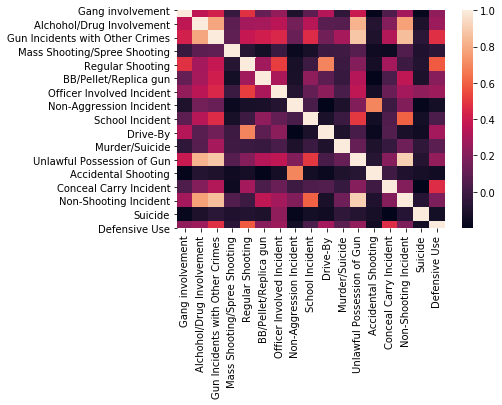

In [19]:
sns.heatmap(freq_df.corr())

In [20]:
types=['Accidental Shooting',
       'Suicide',
       'Murder/Suicide', 
      'Mass Shooting/Spree Shooting', 
      'Non-Shooting Incident',
      'Regular Shooting'
      ]

freq_df[types].loc[types]         # class frequency

Accidental Shooting  Suicide  Murder/Suicide  \
Accidental Shooting                          5013        0               0   
Suicide                                         0     1746               0   
Murder/Suicide                                  0        0            1739   
Mass Shooting/Spree Shooting                    0        0               0   
Non-Shooting Incident                           0        0               0   
Regular Shooting                                0        0               0   

                              Mass Shooting/Spree Shooting  \
Accidental Shooting                                      0   
Suicide                                                  0   
Murder/Suicide                                           0   
Mass Shooting/Spree Shooting                           788   
Non-Shooting Incident                                    0   
Regular Shooting                                         0   

                              Non-Shooting Incident  Regular Shooting  
Accidental Shooting                               0                 0  
Suicide                                           0                 0  
Murder/Suicide                                    0                 0  
Mass Shooting/Spree Shooting                      0                 0  
Non-Shooting Incident                         28928                 0  
Regular Shooting                                  0             62992

In [21]:
mask=target.apply(num_char)==1
characteristics2=[]
for row in target[mask]:
    characteristics2 += row      # .extend works similar to .append

characteristics2=set(characteristics2)
print(len(characteristics2))
characteristics2

6


{'Accidental Shooting',
 'Mass Shooting/Spree Shooting',
 'Murder/Suicide',
 'Non-Shooting Incident',
 'Regular Shooting',
 'Suicide'}

In [22]:
target

0             {Alchohol/Drug Involvement, Regular Shooting}
1         {Gun Incidents with Other Crimes, Murder/Suicide}
2         {Gun Incidents with Other Crimes, Mass Shootin...
3         {Gang involvement, Mass Shooting/Spree Shootin...
4         {Gun Incidents with Other Crimes, Mass Shootin...
                                ...                        
101201                                   {Regular Shooting}
101202                                   {Regular Shooting}
101203                                   {Regular Shooting}
101204                                   {Regular Shooting}
101205    {Murder/Suicide, Gun Incidents with Other Crimes}
Name: incident_characteristics, Length: 101206, dtype: object

In [23]:
type_target=['Accidental Shooting',
    'Suicide',
    'Murder/Suicide', 
    'Mass Shooting/Spree Shooting', 
    'Non-Shooting Incident',
    'Regular Shooting'
      ]
    
acc_shot=target.apply(search_mask,search_li=['Accidental Shooting'])
suicide=target.apply(search_mask,search_li=['Suicide'])
mur_su=target.apply(search_mask,search_li=['Murder/Suicide'])
# shootout=target.apply(search_mask,search_li=['Shootout (where VENN diagram of shooters and victims overlap)'])
mass_shot=target.apply(search_mask,search_li=['Mass Shooting/Spree Shooting'])
non_shot=target.apply(search_mask,search_li=['Non-Shooting Incident'])
# spree_shot=target.apply(search_mask,search_li=['Spree Shooting (multiple victims, multiple locations)'])
reg_shot=target.apply(search_mask,search_li=['Regular Shooting'])
print(sum(acc_shot)+sum(suicide)+sum(mur_su)+sum(mass_shot)+sum(non_shot)+sum(reg_shot))
print(sum(acc_shot^suicide^mur_su^mass_shot^non_shot^reg_shot))

# target_one_hot_encoded=pd.concat([acc_shot,suicide,mur_su,mass_shot,non_shot,reg_shot],axis=1)
# target_one_hot_encoded.columns=type_target
# target_one_hot_encoded

101206
101206


In [24]:
len(target)

101206

In [25]:
desc=characteristics-set(type_target)
descriptors=pd.Series(range(len(target)))
desc_li=list(desc)
for d in desc_li:
    col=target.apply(search_mask,search_li=[d])
    descriptors=pd.concat([descriptors,col],axis=1)
descriptors.drop(0,axis=1,inplace=True)
descriptors.columns=desc_li
descriptors

Gang involvement  Alchohol/Drug Involvement  BB/Pellet/Replica gun  \
0                  False                       True                  False   
1                  False                      False                  False   
2                  False                      False                  False   
3                   True                      False                  False   
4                  False                      False                  False   
...                  ...                        ...                    ...   
101201             False                      False                  False   
101202             False                      False                  False   
101203             False                      False                  False   
101204             False                      False                  False   
101205             False                      False                  False   

        Gun Incidents with Other Crimes  Non-Aggression Incident  \
0                                 False                    False   
1                                  True                    False   
2                                  True                    False   
3                                 False                    False   
4                                  True                    False   
...                                 ...                      ...   
101201                            False                    False   
101202                            False                    False   
101203                            False                    False   
101204                            False                    False   
101205                             True                    False   

        Officer Involved Incident  School Incident  Drive-By  \
0                           False            False     False   
1                           False            False     False   
2                           False            False     False   
3                           False            False      True   
4                            True            False     False   
...                           ...              ...       ...   
101201                      False            False     False   
101202                      False            False     False   
101203                      False            False     False   
101204                      False            False     False   
101205                      False            False     False   

        Unlawful Possession of Gun  Conceal Carry Incident  Defensive Use  
0                            False                   False          False  
1                            False                   False          False  
2                            False                   False          False  
3                            False                   False          False  
4                            False                   False          False  
...                            ...                     ...            ...  
101201                       False                   False          False  
101202                       False                   False          False  
101203                       False                   False          False  
101204                       False                   False          False  
101205                       False                   False          False  

[101206 rows x 11 columns]

In [26]:
target = target.apply(drop_list, drop_char=desc)

In [27]:
type_target=['Accidental Shooting',
    'Suicide',
    'Murder/Suicide', 
    'Mass Shooting/Spree Shooting', 
    'Non-Shooting Incident',
    'Regular Shooting'
      ]
    
acc_shot=target.apply(search_mask,search_li=['Accidental Shooting'])
suicide=target.apply(search_mask,search_li=['Suicide'])
mur_su=target.apply(search_mask,search_li=['Murder/Suicide'])
# shootout=target.apply(search_mask,search_li=['Shootout (where VENN diagram of shooters and victims overlap)'])
mass_shot=target.apply(search_mask,search_li=['Mass Shooting/Spree Shooting'])
non_shot=target.apply(search_mask,search_li=['Non-Shooting Incident'])
# spree_shot=target.apply(search_mask,search_li=['Spree Shooting (multiple victims, multiple locations)'])
reg_shot=target.apply(search_mask,search_li=['Regular Shooting'])

print(sum(acc_shot)+sum(suicide)+sum(mur_su)+sum(mass_shot)+sum(non_shot)+sum(reg_shot))
print(sum(acc_shot^suicide^mur_su^mass_shot^non_shot^reg_shot))
print(sum(acc_shot & suicide & mur_su & mass_shot & non_shot & reg_shot))

101206
101206
0


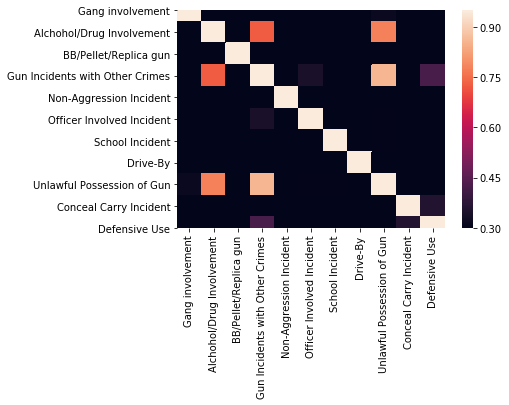

In [28]:
sns.heatmap(freq_df[desc].loc[desc].corr(), vmin=0.3, vmax=0.95)  

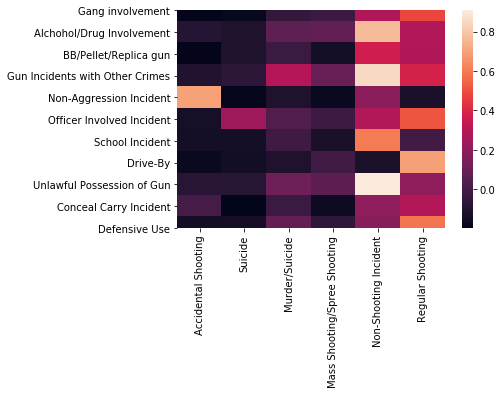

In [29]:
sns.heatmap(freq_df.corr()[types].loc[desc])  

In [30]:
freq_df[types].loc[desc]   
# non agressive suicde overlaps because some in original data overlap

Accidental Shooting  Suicide  Murder/Suicide  \
Gang involvement                                  21        3               0   
Alchohol/Drug Involvement                        401       60              35   
BB/Pellet/Replica gun                             25       16               1   
Gun Incidents with Other Crimes                  497      244            1086   
Non-Aggression Incident                         1578        4               1   
Officer Involved Incident                        241      699             126   
School Incident                                   54       23              13   
Drive-By                                          14       17               4   
Unlawful Possession of Gun                       526      105              34   
Conceal Carry Incident                           177        7              12   
Defensive Use                                     83       12              11   

                                 Mass Shooting/Spree Shooting  \
Gang involvement                                           68   
Alchohol/Drug Involvement                                 162   
BB/Pellet/Replica gun                                       6   
Gun Incidents with Other Crimes                           260   
Non-Aggression Incident                                     0   
Officer Involved Incident                                 102   
School Incident                                             8   
Drive-By                                                  141   
Unlawful Possession of Gun                                126   
Conceal Carry Incident                                     13   
Defensive Use                                              27   

                                 Non-Shooting Incident  Regular Shooting  
Gang involvement                                   800              1641  
Alchohol/Drug Involvement                        10053              6139  
BB/Pellet/Replica gun                              372               329  
Gun Incidents with Other Crimes                  21969             15145  
Non-Aggression Incident                            693               101  
Officer Involved Incident                         2775              5898  
School Incident                                   1343               237  
Drive-By                                            88              4822  
Unlawful Possession of Gun                       17414              6252  
Conceal Carry Incident                             281               408  
Defensive Use                                      628              2746

In [31]:
train=train.reset_index(drop=True)
train

n_killed  n_injured  n_guns_involved  \
0              1          3              2.0   
1              2          2              2.0   
2              5          0              2.0   
3              1          3              1.0   
4              2          3              1.0   
...          ...        ...              ...   
101201         0          0              1.0   
101202         1          0              1.0   
101203         0          1              1.0   
101204         1          0              1.0   
101205         2          0              2.0   

                                    participant_age_group  \
0       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Adul...   
1       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Teen...   
2       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Chil...   
3                                      {0: ['Adult 18+']}   
4       {0: ['Adult 18+'], 1: ['Adult 18+'], 2: ['Adul...   
...                                                   ...   
101201                                 {0: ['Adult 18+']}   
101202               {0: ['Adult 18+'], 1: ['Adult 18+']}   
101203                                 {0: ['Adult 18+']}   
101204                                 {0: ['Adult 18+']}   
101205               {0: ['Adult 18+'], 1: ['Adult 18+']}   

                                       participant_gender  
0       {0: ['Male'], 1: ['Male'], 2: ['Male'], 3: ['M...  
1       {0: ['Female'], 1: ['Male'], 2: ['Male'], 3: [...  
2       {0: ['Male'], 1: ['Female'], 2: ['Male'], 3: [...  
3                                           {0: ['Male']}  
4       {0: ['Male'], 1: ['Male'], 2: ['Male'], 3: ['M...  
...                                                   ...  
101201                                    {0: ['Female']}  
101202                         {0: ['Male'], 1: ['Male']}  
101203                                      {0: ['Male']}  
101204                                      {0: ['Male']}  
101205                       {0: ['Female'], 1: ['Male']}  

[101206 rows x 5 columns]

In [32]:
def bin_column(participants, bins):
    bins = bins.copy()
    for participant in participants:
        bins[participants[participant][0]] += 1
    return bins

age_groups = {'Child 0-11':0, 'Teen 12-17':0, 'Adult 18+':0}
cols = pd.DataFrame(list(train.participant_age_group.apply(bin_column, bins=age_groups)))
train = pd.concat([train, cols], axis=1)
del train['participant_age_group']

genders = {'Male':0, 'Female':0}
cols = pd.DataFrame(list(train.participant_gender.apply(bin_column, bins=genders)))
train = pd.concat([train, cols], axis=1)
del train['participant_gender']

train

n_killed  n_injured  n_guns_involved  Child 0-11  Teen 12-17  \
0              1          3              2.0           0           0   
1              2          2              2.0           0           1   
2              5          0              2.0           3           1   
3              1          3              1.0           0           0   
4              2          3              1.0           0           0   
...          ...        ...              ...         ...         ...   
101201         0          0              1.0           0           0   
101202         1          0              1.0           0           0   
101203         0          1              1.0           0           0   
101204         1          0              1.0           0           0   
101205         2          0              2.0           0           0   

        Adult 18+  Male  Female  
0               5     5       0  
1               3     2       2  
2               2     3       3  
3               1     1       0  
4               5     5       0  
...           ...   ...     ...  
101201          1     0       1  
101202          2     2       0  
101203          1     1       0  
101204          1     1       0  
101205          2     1       1  

[101206 rows x 8 columns]

In [33]:
design=pd.concat([train,descriptors],axis=1)
del train
design

n_killed  n_injured  n_guns_involved  Child 0-11  Teen 12-17  \
0              1          3              2.0           0           0   
1              2          2              2.0           0           1   
2              5          0              2.0           3           1   
3              1          3              1.0           0           0   
4              2          3              1.0           0           0   
...          ...        ...              ...         ...         ...   
101201         0          0              1.0           0           0   
101202         1          0              1.0           0           0   
101203         0          1              1.0           0           0   
101204         1          0              1.0           0           0   
101205         2          0              2.0           0           0   

        Adult 18+  Male  Female  Gang involvement  Alchohol/Drug Involvement  \
0               5     5       0             False                       True   
1               3     2       2             False                      False   
2               2     3       3             False                      False   
3               1     1       0              True                      False   
4               5     5       0             False                      False   
...           ...   ...     ...               ...                        ...   
101201          1     0       1             False                      False   
101202          2     2       0             False                      False   
101203          1     1       0             False                      False   
101204          1     1       0             False                      False   
101205          2     1       1             False                      False   

        BB/Pellet/Replica gun  Gun Incidents with Other Crimes  \
0                       False                            False   
1                       False                             True   
2                       False                             True   
3                       False                            False   
4                       False                             True   
...                       ...                              ...   
101201                  False                            False   
101202                  False                            False   
101203                  False                            False   
101204                  False                            False   
101205                  False                             True   

        Non-Aggression Incident  Officer Involved Incident  School Incident  \
0                         False                      False            False   
1                         False                      False            False   
2                         False                      False            False   
3                         False                      False            False   
4                         False                       True            False   
...                         ...                        ...              ...   
101201                    False                      False            False   
101202                    False                      False            False   
101203                    False                      False            False   
101204                    False                      False            False   
101205                    False                      False            False   

        Drive-By  Unlawful Possession of Gun  Conceal Carry Incident  \
0          False                       False                   False   
1          False                       False                   False   
2          False                       False                   False   
3           True                       False                   False   
4          False                       False                   False   
...     

In [34]:
target=target.apply(set.pop)
type(target)

0                     Regular Shooting
1                       Murder/Suicide
2         Mass Shooting/Spree Shooting
3         Mass Shooting/Spree Shooting
4         Mass Shooting/Spree Shooting
                      ...             
101201                Regular Shooting
101202                Regular Shooting
101203                Regular Shooting
101204                Regular Shooting
101205                  Murder/Suicide
Name: incident_characteristics, Length: 101206, dtype: object

TRAIN: [34708 84865 74445 ... 40858 69196  3690] TEST: [35942 70813 25191 ... 43026 74061 74965]
0.8510028653295129


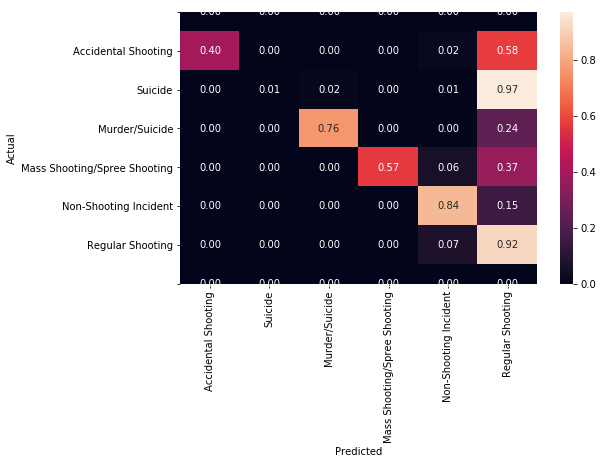

TRAIN: [33786 18374  1008 ... 33991 51662 98415] TEST: [41725 51511 18849 ... 28616 84975 48030]
0.8499160162039324


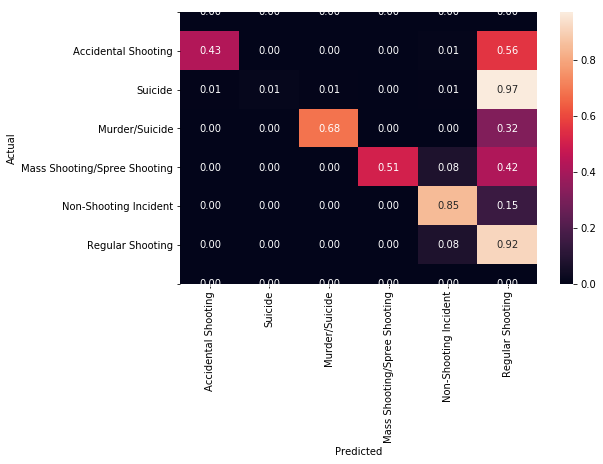

TRAIN: [21203 19688 33511 ... 30955 81503 88063] TEST: [99157 59280 54937 ... 89809 13482 72106]
0.8512004742614366


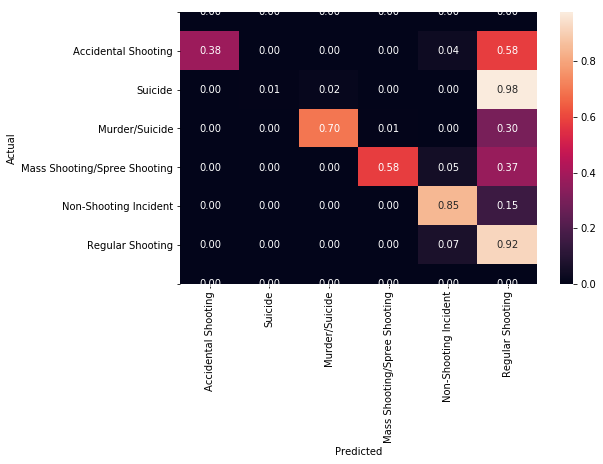

TRAIN: [67033 45806 29779 ... 78881 79243 83862] TEST: [ 4619  8323 37470 ... 13899 53848    76]
0.8455686197016105


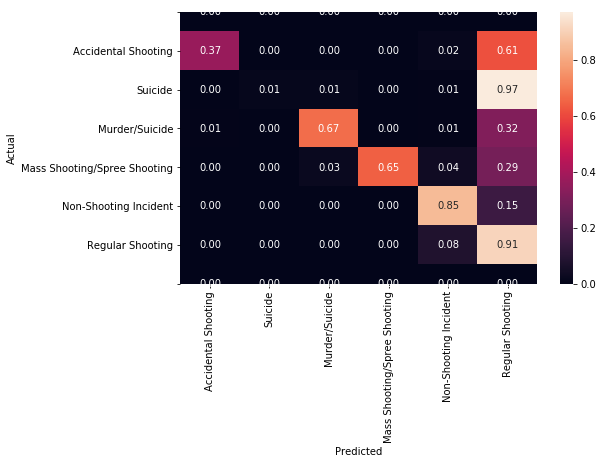

TRAIN: [80752 70263 77351 ...  5551 89442 13357] TEST: [65183 72376 28974 ... 81929 70268 94469]
0.8436913348483351


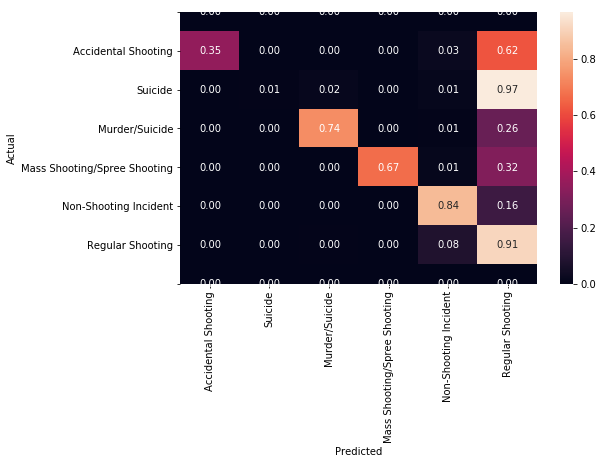

TRAIN: [45741 77740 44703 ... 38054 46612 77272] TEST: [ 98701  43682 100432 ...  12141  21898  98522]
0.8506076474656654


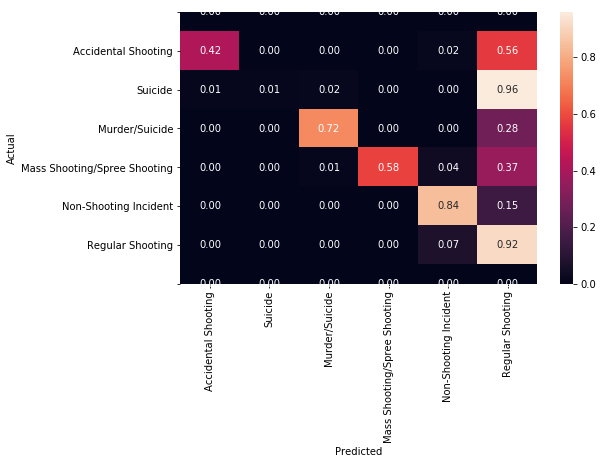

TRAIN: [ 4915 17901 19603 ... 40101 56096  8084] TEST: [58860 90642 89277 ... 25583 84462 85035]
0.8493231894081612


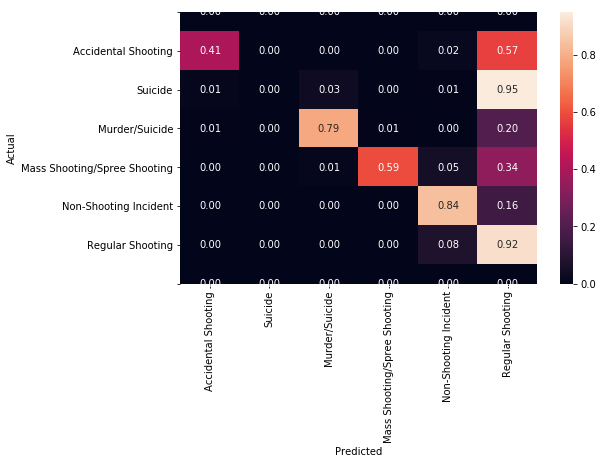

TRAIN: [100634  53755  16198 ...  25200  19411  23872] TEST: [91365 62587  1249 ... 32155 55759 22758]
0.8460626420314198


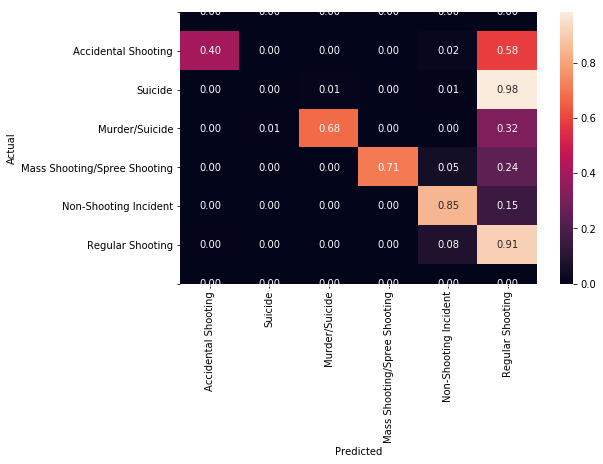

TRAIN: [55606 33588 40265 ... 40456 47463 58678] TEST: [52888 87474 17735 ... 92614  8091 12433]
0.8460626420314198


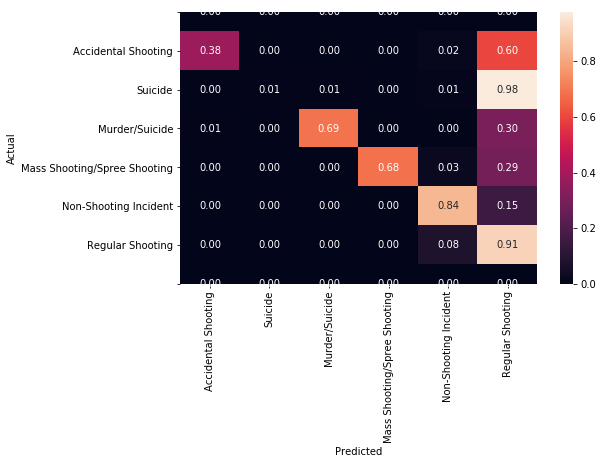

TRAIN: [52603 38502 43064 ... 22763 42379 42229] TEST: [21942 79712 11562 ... 54863 73144 88436]
0.8440865527121826


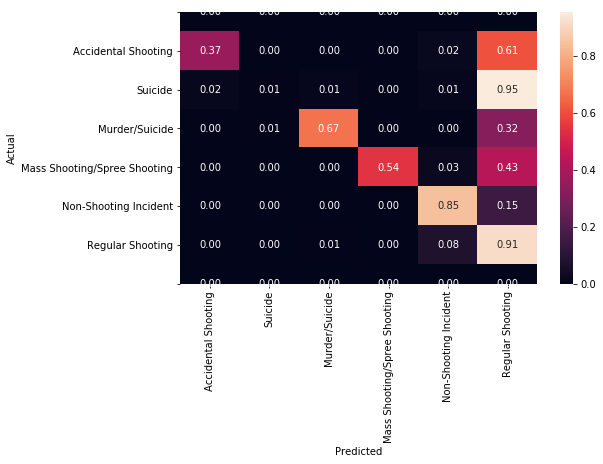

In [51]:
# Random Forest PRE
#----------------------------------------
import imblearn
from numpy import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit

clf = RandomForestClassifier(max_depth=13, random_state=42)
clf.fit(design, target)
clf.score(design,target)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.10, random_state=42)
sss.get_n_splits(design,target)

# parameters={'criterion':['gini'],
#             'n_estimators':[10],
#             'max_depth':[8],
#             }

# rf = RandomForestClassifier(random_state=42)
# rus = RandomUnderSampler(sampling_strategy='all',random_state=42)
# design_s, target_s = rus.fit_resample(design.values, target.values)

# clf=GridSearchCV(rf,parameters)  
# clf.fit(design_s,target_s)

for train_index, test_index in sss.split(design.values, target.values):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = design.values[train_index], design.values[test_index]
    y_train, y_test = target.values[train_index], target.values[test_index]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.score(X_test,y_test))
    
    conf=confusion_matrix(y_test, y_pred, types)
    c = conf/conf.astype(np.float).sum(axis=1)[:, np.newaxis]
    dummy_row=np.zeros((6,))
    c = np.vstack([dummy_row,c,dummy_row])
    fig, ax = plt.subplots(figsize=(8,5))
    c=pd.DataFrame(c)
    sns.heatmap(c, annot=True, fmt='.2f', xticklabels=types, yticklabels=['']+types+[''])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

    

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
TRAIN: [2245 1849 2538 ...  299  116 4472] TEST: [3829 3580 1020 1295 4443  614 2161 2483  504 1808 4362 3447 2333 1501
 1293 1036 3339 3323 2511  241  269 1596 1650 1582 1001 3224  699  205
 4124 1321  792 2042 2392 4317 2468 1614  161  566    1 3719 2574 2830
 3528  510 1513 3511 1090  700 4080 2030 2799 2113  790 2713  454  385
 3526  663 4590 3361 2464 4521 2091 3409 3174 1261 1479 2605 3931  815
 2279 3462 3258 1592 4321 3605  860 2049 3949 1044   87 2926 2460 4193
 4137 1173  769 3445 3725 4450 2988 3299 2715 1018  562  308 1832  372
 3508 1150 4499  413  476 1530 1732 2035 3691 4357 4051   13 4012 3986
  191  166 3232 2913 2771 3702 2406 3430 3531 4106 2986  201 3115 4282
  466 3977 1152 1853  427 2059 4211 3124  330  343 1878 3820  775 2114
 3656 4020  401 1817 3572 2788 4041 2590 2371 2754 2756  475 3809 1410
   21 2854  214 2282  474 1556 2583 2805 1517 3711 2450 3591 1738 3538
 1901 3122  795 2984 1771 4247 2442 2536 2944  273 

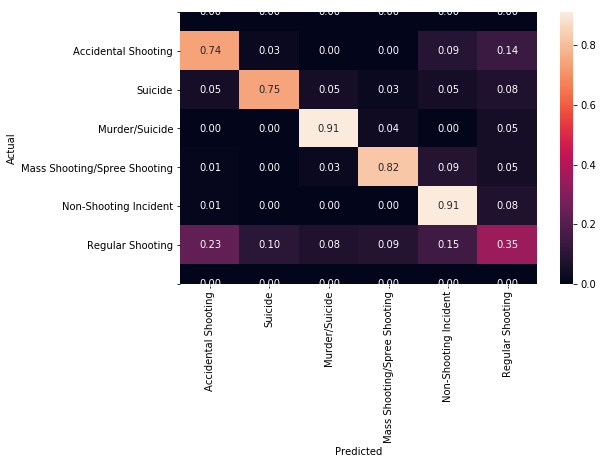

TRAIN: [1400 1053 4580 ... 1089 4088 3891] TEST: [ 378 4246 2289 4615 1072 2332 1373 4295 1895 1178 3305 1407 3516 3317
 3732   67 4434  524 3605 3356 3031  567 2065 4268 1474 1320 3325 2339
 4025 1293 1775 4700  358  146  526  113 3927   84  815 1771 4713 4469
 2226  557 2858 2265  537 1558  329  710 3284 2773  114 4487 1505  418
  508  877 3597 1809 3213 4403 2957  103 3244  305 1475 3070 4330  887
 1848 2770 3168 1986 3275 2078 2013 3010 3211  970 2865  127 1394 1174
 1811 3880 2947  916 3276 2043   52 4334  622 2975  178 1266 4163 2041
 2692 1171 1344 1854 4588 2778 2580 2691 3798 1670 2980  143  667 4315
 2250 3117  973 2315  349 2225 1258 4561 1019 2855 2015 4514 1254 3801
 3691 3872 2958  834 2069  275 1539  129 3530 2240 2622 3985 3459 3015
 2468 2108  585 1388 4312 1566 2629 1883 3150 1047 2694 2067 3216 1544
 1787 1596 3113 2355 4489 1575 2849  705 4214 2884 2080 2097 1818 3899
 1991 3945  913 1349 4263 4224 3833 1078 4567 3999  413 1356 3357  601
 1737  753 3120 3642 2619 29

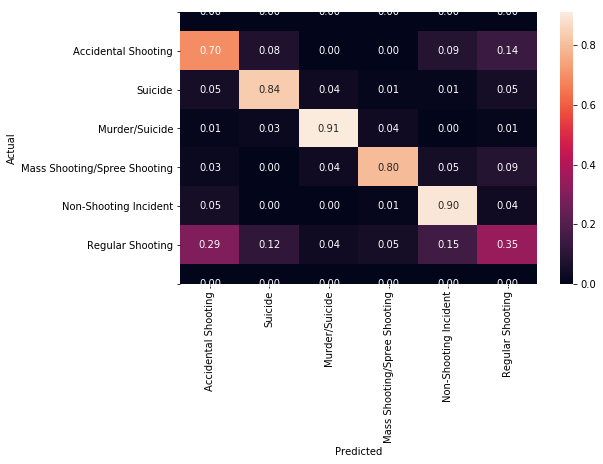

TRAIN: [1321  313 1571 ... 4073  461 2363] TEST: [ 431  998 2988 4091 2754 2089 1030 4059 4293 3712 3842 2580 1109  286
 1086 1063 2782 2712 2181  296  232 2269 1569 4243 2215 2893 3050 2507
 4535 3619  856  613 1849 2429 3560  474 1106 4309 3018 3758 1852 2351
 3119 1627 1017  293 1402 2401 1542 1445 4616 3507  794 1890  446 1080
 1069  640  864  532  407 3944  391  988 3016 2399  762 1297 3965 1374
 1339 1100  320 3686 1626 3999 1652  647 3374 4329 3481 1261 3819 2546
 4541 2531 3805  236 4210 1712   92  475 2336  181 3751 4489 2213 1148
 4303 2272 2520  680 3254   77 2405 4458 3180 1206 4008 1894 3389 3390
  482 4141 1952 1716 3086 2588 2964 1949  494  845 4021 1073 3937 1164
 2016 3874 2706 1382 2466 2549 1443 4621 1050 2025 3708 3417 1619 2986
 2763 3836 1794  117 3796 2192 3101 1265 3696 2333 3370 3761 2834 1507
 1358  611 1337 2661 1475 1908 1064 1207 2838 4042  252 3444 2324 1685
 4322 4334 4047 3175  932 4567 2438 2222 1853  142 3168 2018 1463 4095
 2156  357  563 1412 2497 47

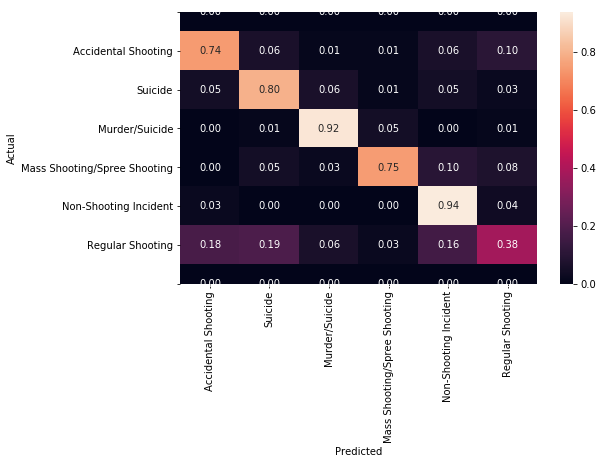

TRAIN: [  47  143 2103 ... 2593  673 3305] TEST: [3415 2488 3111 1632 1597 2384 2086  676 3917  768 1547 2591 2806 4659
 4271 3290 4043 4250 2743 2031 1345  273 1596 4423  159 3410 4505 3875
 1021 1955 4727 1757  528 3359 1209 3250 4301 1235  858 3185 3149 1511
  900  820 1315 3982 1552 2617 3829 2236  782 2252  188 1666  576 2945
 2855 2825 3370 3888 1715 1379  822 2163 2936 4234 3965 2260 1034  771
 2810 3146 4221 3985  351 4484 1246 4316 2271 4348 1507 1004 1882 2123
  205   35  721 2209  895 3891 4696 1461 2857 4642 1059 4263 2817 3332
 3662 4470  403 1401 4270 2206 3292 2608 2813 2787 4707 3972 1103 4438
  325 1828 1132  662 2567 1016 1648 4663  906 1165 1154 3382 2833 4675
 1932 3642 1771 1523  607 3842 1869 1419 3775 1242 3501 1908  414 2479
 2363  842 3611 3000 1063 2414  652 3777 3960  145 1284 4059 1197 3831
  554 1144  707 2725 3727 1874  694  729 2655 4182 2429 1415 3498 3631
 2520 1991  984 3374 1459 3936 3030  748  264 3128 4278 2692  887 3987
   58 3849 4704  130 2343  8

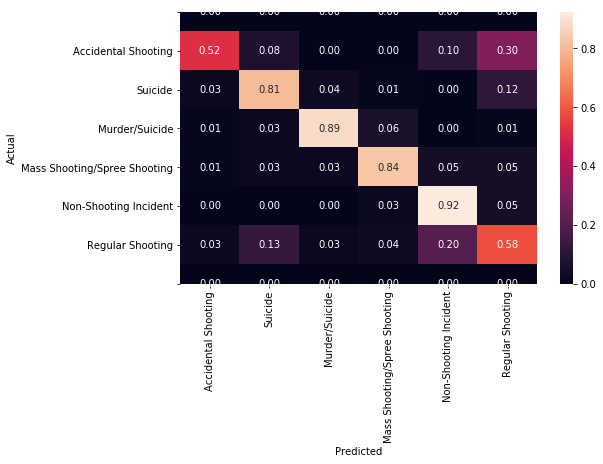

TRAIN: [ 739  470  237 ...  959 4258 3589] TEST: [ 306 2282 1937   52 2897  677 2114 4060 3093 3592 3601 4046 1639  399
  351  956 4145 3020  494 1227 3053 1732 2979 1974  522 1799 4161 3586
 3796 3870  269 4074 1041 4601 1586 3085 3418 3177 1807  241 3953  655
 3428  868 3285 1600  872 1649 3969  312 1117 3752 2725 2494  341 1562
  413 2972 2448   64  980 2906 1384 4006  242  508  922 2739  989 3979
 1641 2045 1454 3106 3655  209 3686 3762 1290  420 2718 2566 3644 1136
 3261 3231  704 1558   41 4526 3448 4612 4702 1908 3206 4593 2463 3727
 4672 2306 3695  589 2263 2867 1132 4329 2512 2312 4358 2710  450 2091
 4704  866 4596 1080 4725 2285 1654  854 1574 4693 1619  942 2571  632
 3758 3652 3460 2139  254 1303 2594 3576 4017 4686 1141 1896 2585   33
 3288  968 2206 1226 2147 1326 3851 1380 4002 2700 1349 3950 1980 3548
  112 2446 4332  952 2664 2733 4126  177 3419 1386 2641  337 3251 2572
  298 3463  876 3415 4562 2235 4513 1589 2839 1905 1635 2177  426  933
 1590 2778 3925  519 3114  2

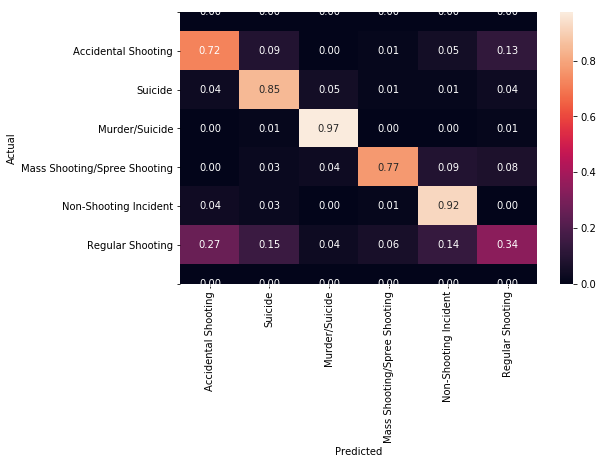

TRAIN: [2617  272 1380 ... 1689 1458 2327] TEST: [4123 3932  733  424 2251 1163 1692  661 1355 1682 1336 2660 2879  322
  509  547 2408 1245 4278  956 1626 4691 2946 3087  523 1543 1091 3317
 2067 2622 3130 4590 3996  682  775 1777 2509 4577  552 4559 1704 3048
 1038  995 1774 3153 2423 1791  116 4463 2478  732 2138  267 4203 2625
 1065 1272  581 4171 4211 4375  475 1140 3527 1897 3178   69 1005 3630
 3029   20 1307 4039 3234 4086 4068 3359 2192 3845  990 4564 3119 1459
 2731 1346 1737  129  938 3187 1879 1980 1086 2122 3633 1665  174 2336
 1029 3294  818 2144 2245 1987 3070 1866 2228 2066  165 2859 4336 2039
  207 1651  300 4398 4174  891  934 1945  558 3172 2857  213 1882 3295
 3034  919 1727 1896  483 2115 2911 3754 2902  728 4082 1103 2993 1695
  753 1942 3589 1143 3766 4474 3535 3713 1426 2331 1464  200 3151 3994
 4213 2784  102  118  579 3513 2073  408  347 2080 2842 1519 2168 1384
 3671 3196 4169  238 2624 3509 4537 1285 1740 2564 4417 3396 1931 3536
 1055 2950 3243  930 2065 14

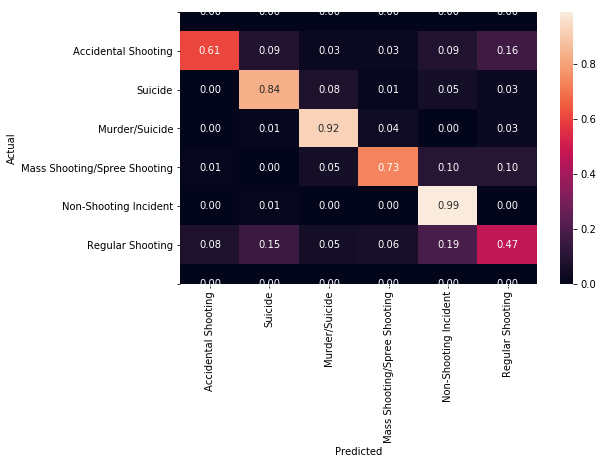

TRAIN: [ 812 3513 1600 ... 4217 1949 3072] TEST: [3719 4720 2126 4554  210 1391 3406 2019 3852 1652 1761 3282 1364  718
 2871 1787 4494 2346 2742 2289 4593  234 4346 1319 2724  598 3318 1851
 2376 4147 3835 3738 1988 2080 3226 4662 4395 1966 2218 1308   22 1107
 2818   44  386 1006 3234 3458 2992 3189 3497  217 4020 3076 2211 1071
 3810 1244  241 3095 1469 1691 1735 3396 1815 4083 4667  488 2463 2317
  630  850 3673 1331 4010  773 2077 4383 2597  900 3900 3858 1690 1537
 4166 3729 4325 1543 1398 4683  347 2819 3698 1242 1580  415 4005 2768
 4162 4516 1329 3782 1833 4252 2165 4698 4538 2993 3379 1956 3373 3933
  434 3420 4342  523 1082 2692 4180 1368 2170  226  608 1130 1387  481
 3395 1014 1354 1512 1373 4435 1940  380 2033 3125  407 2474  409 1407
 1539 2595  147  525 2183  839 2926 3486 1292 3657 3436  541  786 1633
 3407  940 2694 2774 2612 3337  143  199 3906 1843 1406 2467 3925  874
 2047 4201   57 1348 3291 1823 1143 4528    3 2494  761 3763 1882 2296
 1923 2014 2729  390 3360 21

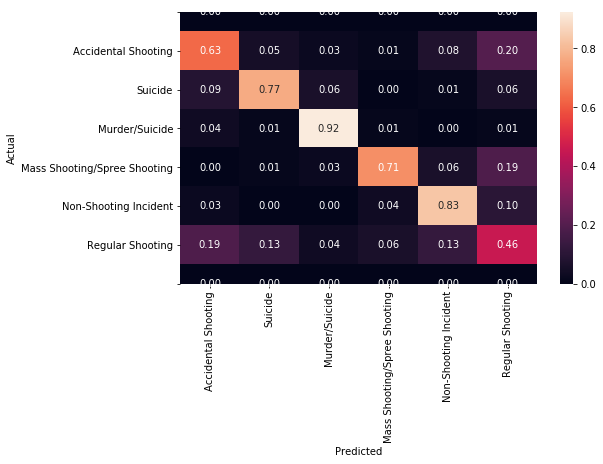

TRAIN: [ 230  259 3756 ... 2863 1244 2259] TEST: [ 772 4650 2017 3551 2031 2050 4194 1659 1811 4606 2979 4424 2558 1896
  674 2142 1873 3277 2366  996 3845 1688 4419 4024  989 3921 2289  704
 3375 2922 4595 3763 3559  609 1501 4082  680 4307 4045 3350 1577 2075
 4371 1890 3123 4527 4057 4486 1344  433 2087 1881  791 1822 3684 1053
 2078 1573 1262 1308 2358 3491 3993 2614  771 4138 3729 1627 3668 3080
 3771 2091 1689 2252 3424 2504 4270 2637 4398  405  976 2681 3823 3532
  144 3567 2695 1633 4220  839 4310 3291 3664 3402  689  173 1674 2844
  345 3380 2327 1432 2715  860 1779 1099 1028 3554  277 3077 1485 3057
 3043 3972 1253 2770  421 2285 4552 2265 2535 2269  586 1843 1329  154
  152  249 3840 3912 2966  657 1849 1815  353 1415 2956 3134  894 2833
 1020 2377 1003 4551  438 1907  211  909 3422 4225  441  568 3206  180
 1241 2641 1928  947 1940  352 4661 1484 3407 2024 1840 4593 4091  476
  195  886  392  739 1875 1637 2771 2591  550 3102  911 1045  490 3922
 1320 2362 3557  348 2277 36

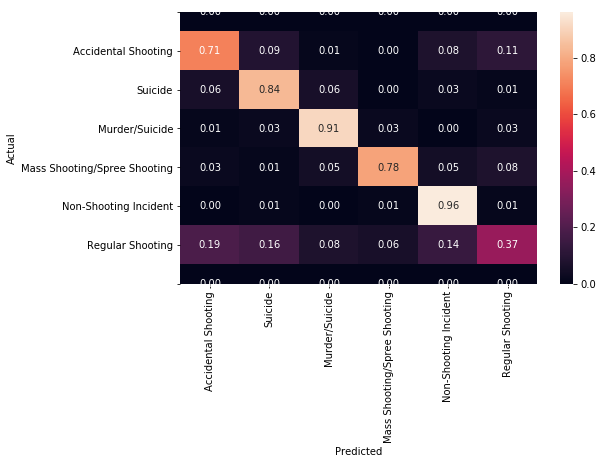

TRAIN: [3902  796 4130 ... 1290 2627 2530] TEST: [4335 1232 2934 4645 1012 2781  151 3335 1726  650  147 4176  395  227
 3156 2706  854 4603 3238 2420 3169 1364 3826 2999 2792 4359 3745 2107
 2662 1488 2773 2153 1340  905 3321 4209  960 3630 4531 1583 3947 3440
 2260 3909 2904 2002 4481  245 2799 4136  174 1512 1172 2957 3063 2452
 3726 3936 4424 1833 4049  497  872  571   15 4393 2090  366 4619 2819
  755 4540 2760 1940 1635 1125 3869 1858  177  411 3926 3304 4721  931
 4326 3381   14 2651 4574 1272 3629  112 4149 2730 1325 1818 4288 1357
 1266   36 2237 2915 2148 2994 3033 4633  561 3182 3631  307 2145 2835
  529 3734 1746 4179 1788 4422 1294 2448  772 3355 4274 2149 4511 3363
 2747  941 3421 3310 3297  738 1850  326  855 4052 1844 3997  578 3465
 1226 1080 4312 4400  175 1687 2935 2717 3834  646 1804 3383  752 3800
 4186  259 4709 3750 3489 1381  823 4524 2924 1832 2546 3174 2352 1111
  599 3357 3294  889 1754 1779 1998 3847 3903 1879 3250  418  537  155
 1706 3083 4087 3784 2537 40

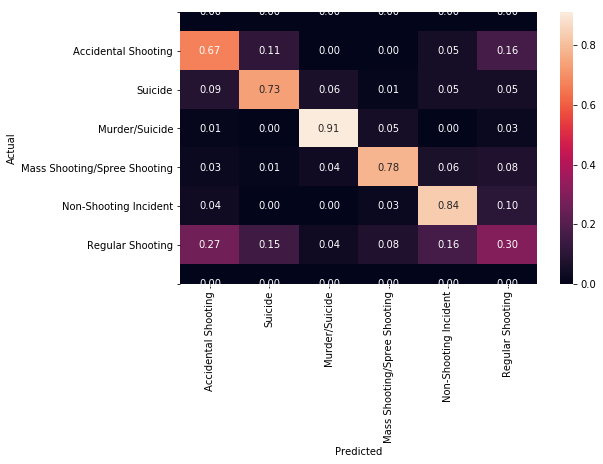

TRAIN: [4645 2469  207 ... 3585 1719 1066] TEST: [1694 3385  138 4061 2295 2814  569 1340 3451 1161 2622 3476 4166 2138
  870 2688 4701   37 1902 2496 1591  486 3860  812 3334 1055 2147  892
 4197  891 3120 4219 1059 2602  581 1731 3942  339  671 4184 3199 1012
 3904 3907 4726   35 1929 3868 3308  931  235  974 2289  780 1700 4332
 1104  390 4204 1117 4385 1010 1948 3758 1207 3412 2056 4129 3596 4208
 3608 2327 4542  453 2686  674 4078 4573 3574  176 3145 1546 2423 1053
 1924  574 4438 1048  990 1089 1773 3115 2522  461 3417 3411 2884 4144
 2543 2941 3755  936 3887 1803 3463 2052 3048 3884 1486 2601 4095 1751
  737 1941 4548  104 1883 3919 3101 4048 1230 2805  446 2270 4431 1466
   14 2524 3140  650 3498 2148 1094  412 2900   99  948 4276 2080 1872
 1837 2667 1015 3881 2867  124 3035 2007 3204  675 2111 1212 3824  934
  988 2938 4354 3428 1378 1471 4611  365 1562 2149  798 3368  173 3112
 2997 2171 2728 1240  508 2448 4519 3342 4708 1369 2827 3378 4323 2189
 4543 3337 1930 3121 4069 39

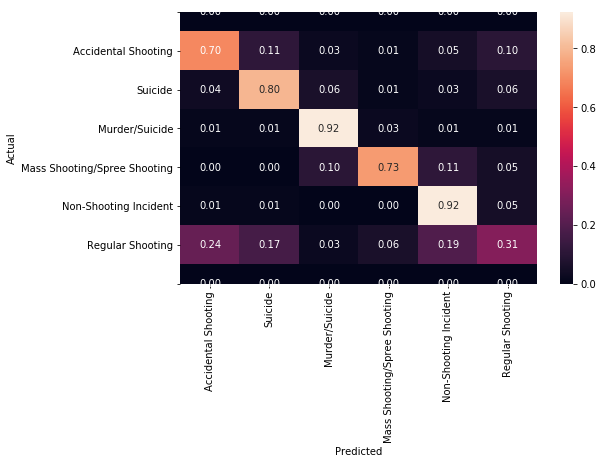

In [53]:
# Random Forest
import imblearn
from numpy import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.10, random_state=42)
sss.get_n_splits(design,target)

parameters={'criterion':['gini','entropy'],
            'n_estimators':[i for i in range(4,10,2)],
            'max_depth':[i for i in range(8,15,1)],
            'min_samples_leaf':[i for i in range(5,30,5)]}

rf = RandomForestClassifier(random_state=42)
rus = RandomUnderSampler(sampling_strategy='all',random_state=42)
design_s, target_s = rus.fit_resample(design.values, target.values)


clf=GridSearchCV(rf,parameters)  
clf.fit(design_s,target_s)

for train_index, test_index in sss.split(design_s, target_s):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = design_s[train_index], design_s[test_index]
    y_train, y_test = target_s[train_index], target_s[test_index]
    clf.best_estimator_.fit(X_train,y_train)
    y_pred=clf.best_estimator_.predict(X_test)
    print(clf.best_estimator_.score(X_test,y_test))
    
    conf=confusion_matrix(y_test, y_pred, types)
    c = conf/conf.astype(np.float).sum(axis=1)[:, np.newaxis]
    dummy_row=np.zeros((6,))
    c = np.vstack([dummy_row,c,dummy_row])
    fig, ax = plt.subplots(figsize=(8,5))
    c=pd.DataFrame(c)
    sns.heatmap(c, annot=True, fmt='.2f', xticklabels=types, yticklabels=['']+types+[''])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

    

In [36]:
clf.best_estimator_.fit(design_s,target_s)
clf.best_estimator_.score(design_s,target_s)

0.7654399323181049

TRAIN: [2245 1849 2538 ...  299  116 4472] TEST: [3829 3580 1020 1295 4443  614 2161 2483  504 1808 4362 3447 2333 1501
 1293 1036 3339 3323 2511  241  269 1596 1650 1582 1001 3224  699  205
 4124 1321  792 2042 2392 4317 2468 1614  161  566    1 3719 2574 2830
 3528  510 1513 3511 1090  700 4080 2030 2799 2113  790 2713  454  385
 3526  663 4590 3361 2464 4521 2091 3409 3174 1261 1479 2605 3931  815
 2279 3462 3258 1592 4321 3605  860 2049 3949 1044   87 2926 2460 4193
 4137 1173  769 3445 3725 4450 2988 3299 2715 1018  562  308 1832  372
 3508 1150 4499  413  476 1530 1732 2035 3691 4357 4051   13 4012 3986
  191  166 3232 2913 2771 3702 2406 3430 3531 4106 2986  201 3115 4282
  466 3977 1152 1853  427 2059 4211 3124  330  343 1878 3820  775 2114
 3656 4020  401 1817 3572 2788 4041 2590 2371 2754 2756  475 3809 1410
   21 2854  214 2282  474 1556 2583 2805 1517 3711 2450 3591 1738 3538
 1901 3122  795 2984 1771 4247 2442 2536 2944  273 2102 2683 2313 2321
 1311 2729 1026 2015 3756 37

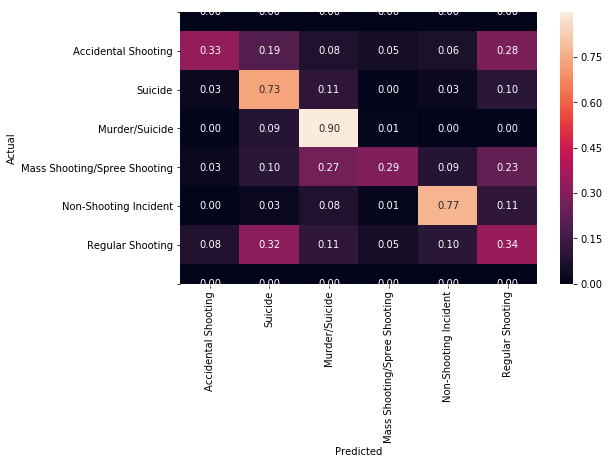

TRAIN: [1400 1053 4580 ... 1089 4088 3891] TEST: [ 378 4246 2289 4615 1072 2332 1373 4295 1895 1178 3305 1407 3516 3317
 3732   67 4434  524 3605 3356 3031  567 2065 4268 1474 1320 3325 2339
 4025 1293 1775 4700  358  146  526  113 3927   84  815 1771 4713 4469
 2226  557 2858 2265  537 1558  329  710 3284 2773  114 4487 1505  418
  508  877 3597 1809 3213 4403 2957  103 3244  305 1475 3070 4330  887
 1848 2770 3168 1986 3275 2078 2013 3010 3211  970 2865  127 1394 1174
 1811 3880 2947  916 3276 2043   52 4334  622 2975  178 1266 4163 2041
 2692 1171 1344 1854 4588 2778 2580 2691 3798 1670 2980  143  667 4315
 2250 3117  973 2315  349 2225 1258 4561 1019 2855 2015 4514 1254 3801
 3691 3872 2958  834 2069  275 1539  129 3530 2240 2622 3985 3459 3015
 2468 2108  585 1388 4312 1566 2629 1883 3150 1047 2694 2067 3216 1544
 1787 1596 3113 2355 4489 1575 2849  705 4214 2884 2080 2097 1818 3899
 1991 3945  913 1349 4263 4224 3833 1078 4567 3999  413 1356 3357  601
 1737  753 3120 3642 2619 29

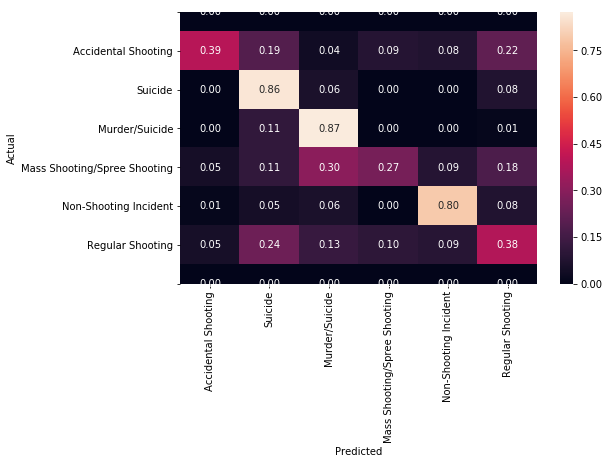

TRAIN: [1321  313 1571 ... 4073  461 2363] TEST: [ 431  998 2988 4091 2754 2089 1030 4059 4293 3712 3842 2580 1109  286
 1086 1063 2782 2712 2181  296  232 2269 1569 4243 2215 2893 3050 2507
 4535 3619  856  613 1849 2429 3560  474 1106 4309 3018 3758 1852 2351
 3119 1627 1017  293 1402 2401 1542 1445 4616 3507  794 1890  446 1080
 1069  640  864  532  407 3944  391  988 3016 2399  762 1297 3965 1374
 1339 1100  320 3686 1626 3999 1652  647 3374 4329 3481 1261 3819 2546
 4541 2531 3805  236 4210 1712   92  475 2336  181 3751 4489 2213 1148
 4303 2272 2520  680 3254   77 2405 4458 3180 1206 4008 1894 3389 3390
  482 4141 1952 1716 3086 2588 2964 1949  494  845 4021 1073 3937 1164
 2016 3874 2706 1382 2466 2549 1443 4621 1050 2025 3708 3417 1619 2986
 2763 3836 1794  117 3796 2192 3101 1265 3696 2333 3370 3761 2834 1507
 1358  611 1337 2661 1475 1908 1064 1207 2838 4042  252 3444 2324 1685
 4322 4334 4047 3175  932 4567 2438 2222 1853  142 3168 2018 1463 4095
 2156  357  563 1412 2497 47

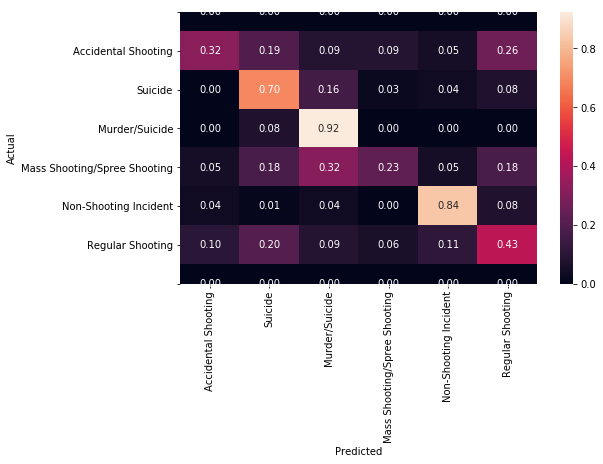

TRAIN: [  47  143 2103 ... 2593  673 3305] TEST: [3415 2488 3111 1632 1597 2384 2086  676 3917  768 1547 2591 2806 4659
 4271 3290 4043 4250 2743 2031 1345  273 1596 4423  159 3410 4505 3875
 1021 1955 4727 1757  528 3359 1209 3250 4301 1235  858 3185 3149 1511
  900  820 1315 3982 1552 2617 3829 2236  782 2252  188 1666  576 2945
 2855 2825 3370 3888 1715 1379  822 2163 2936 4234 3965 2260 1034  771
 2810 3146 4221 3985  351 4484 1246 4316 2271 4348 1507 1004 1882 2123
  205   35  721 2209  895 3891 4696 1461 2857 4642 1059 4263 2817 3332
 3662 4470  403 1401 4270 2206 3292 2608 2813 2787 4707 3972 1103 4438
  325 1828 1132  662 2567 1016 1648 4663  906 1165 1154 3382 2833 4675
 1932 3642 1771 1523  607 3842 1869 1419 3775 1242 3501 1908  414 2479
 2363  842 3611 3000 1063 2414  652 3777 3960  145 1284 4059 1197 3831
  554 1144  707 2725 3727 1874  694  729 2655 4182 2429 1415 3498 3631
 2520 1991  984 3374 1459 3936 3030  748  264 3128 4278 2692  887 3987
   58 3849 4704  130 2343  8

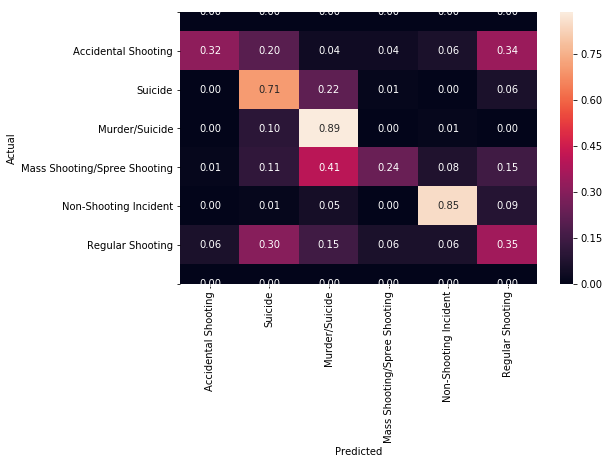

TRAIN: [ 739  470  237 ...  959 4258 3589] TEST: [ 306 2282 1937   52 2897  677 2114 4060 3093 3592 3601 4046 1639  399
  351  956 4145 3020  494 1227 3053 1732 2979 1974  522 1799 4161 3586
 3796 3870  269 4074 1041 4601 1586 3085 3418 3177 1807  241 3953  655
 3428  868 3285 1600  872 1649 3969  312 1117 3752 2725 2494  341 1562
  413 2972 2448   64  980 2906 1384 4006  242  508  922 2739  989 3979
 1641 2045 1454 3106 3655  209 3686 3762 1290  420 2718 2566 3644 1136
 3261 3231  704 1558   41 4526 3448 4612 4702 1908 3206 4593 2463 3727
 4672 2306 3695  589 2263 2867 1132 4329 2512 2312 4358 2710  450 2091
 4704  866 4596 1080 4725 2285 1654  854 1574 4693 1619  942 2571  632
 3758 3652 3460 2139  254 1303 2594 3576 4017 4686 1141 1896 2585   33
 3288  968 2206 1226 2147 1326 3851 1380 4002 2700 1349 3950 1980 3548
  112 2446 4332  952 2664 2733 4126  177 3419 1386 2641  337 3251 2572
  298 3463  876 3415 4562 2235 4513 1589 2839 1905 1635 2177  426  933
 1590 2778 3925  519 3114  2

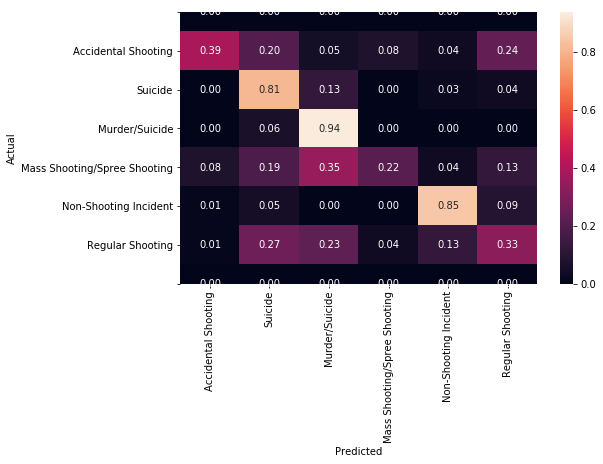

TRAIN: [2617  272 1380 ... 1689 1458 2327] TEST: [4123 3932  733  424 2251 1163 1692  661 1355 1682 1336 2660 2879  322
  509  547 2408 1245 4278  956 1626 4691 2946 3087  523 1543 1091 3317
 2067 2622 3130 4590 3996  682  775 1777 2509 4577  552 4559 1704 3048
 1038  995 1774 3153 2423 1791  116 4463 2478  732 2138  267 4203 2625
 1065 1272  581 4171 4211 4375  475 1140 3527 1897 3178   69 1005 3630
 3029   20 1307 4039 3234 4086 4068 3359 2192 3845  990 4564 3119 1459
 2731 1346 1737  129  938 3187 1879 1980 1086 2122 3633 1665  174 2336
 1029 3294  818 2144 2245 1987 3070 1866 2228 2066  165 2859 4336 2039
  207 1651  300 4398 4174  891  934 1945  558 3172 2857  213 1882 3295
 3034  919 1727 1896  483 2115 2911 3754 2902  728 4082 1103 2993 1695
  753 1942 3589 1143 3766 4474 3535 3713 1426 2331 1464  200 3151 3994
 4213 2784  102  118  579 3513 2073  408  347 2080 2842 1519 2168 1384
 3671 3196 4169  238 2624 3509 4537 1285 1740 2564 4417 3396 1931 3536
 1055 2950 3243  930 2065 14

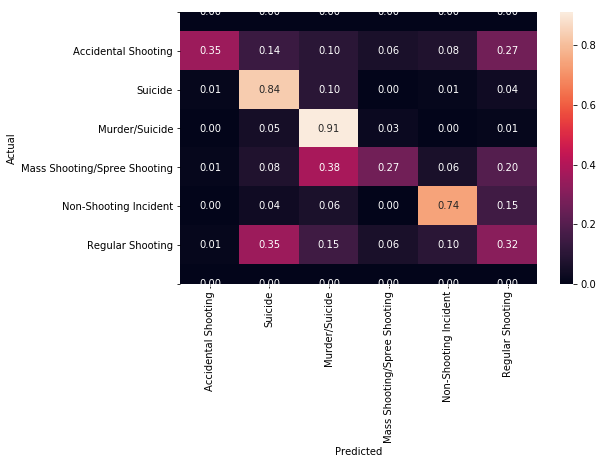

TRAIN: [ 812 3513 1600 ... 4217 1949 3072] TEST: [3719 4720 2126 4554  210 1391 3406 2019 3852 1652 1761 3282 1364  718
 2871 1787 4494 2346 2742 2289 4593  234 4346 1319 2724  598 3318 1851
 2376 4147 3835 3738 1988 2080 3226 4662 4395 1966 2218 1308   22 1107
 2818   44  386 1006 3234 3458 2992 3189 3497  217 4020 3076 2211 1071
 3810 1244  241 3095 1469 1691 1735 3396 1815 4083 4667  488 2463 2317
  630  850 3673 1331 4010  773 2077 4383 2597  900 3900 3858 1690 1537
 4166 3729 4325 1543 1398 4683  347 2819 3698 1242 1580  415 4005 2768
 4162 4516 1329 3782 1833 4252 2165 4698 4538 2993 3379 1956 3373 3933
  434 3420 4342  523 1082 2692 4180 1368 2170  226  608 1130 1387  481
 3395 1014 1354 1512 1373 4435 1940  380 2033 3125  407 2474  409 1407
 1539 2595  147  525 2183  839 2926 3486 1292 3657 3436  541  786 1633
 3407  940 2694 2774 2612 3337  143  199 3906 1843 1406 2467 3925  874
 2047 4201   57 1348 3291 1823 1143 4528    3 2494  761 3763 1882 2296
 1923 2014 2729  390 3360 21

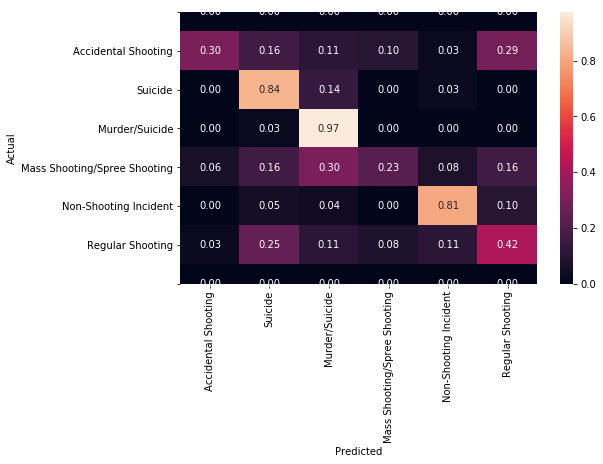

TRAIN: [ 230  259 3756 ... 2863 1244 2259] TEST: [ 772 4650 2017 3551 2031 2050 4194 1659 1811 4606 2979 4424 2558 1896
  674 2142 1873 3277 2366  996 3845 1688 4419 4024  989 3921 2289  704
 3375 2922 4595 3763 3559  609 1501 4082  680 4307 4045 3350 1577 2075
 4371 1890 3123 4527 4057 4486 1344  433 2087 1881  791 1822 3684 1053
 2078 1573 1262 1308 2358 3491 3993 2614  771 4138 3729 1627 3668 3080
 3771 2091 1689 2252 3424 2504 4270 2637 4398  405  976 2681 3823 3532
  144 3567 2695 1633 4220  839 4310 3291 3664 3402  689  173 1674 2844
  345 3380 2327 1432 2715  860 1779 1099 1028 3554  277 3077 1485 3057
 3043 3972 1253 2770  421 2285 4552 2265 2535 2269  586 1843 1329  154
  152  249 3840 3912 2966  657 1849 1815  353 1415 2956 3134  894 2833
 1020 2377 1003 4551  438 1907  211  909 3422 4225  441  568 3206  180
 1241 2641 1928  947 1940  352 4661 1484 3407 2024 1840 4593 4091  476
  195  886  392  739 1875 1637 2771 2591  550 3102  911 1045  490 3922
 1320 2362 3557  348 2277 36

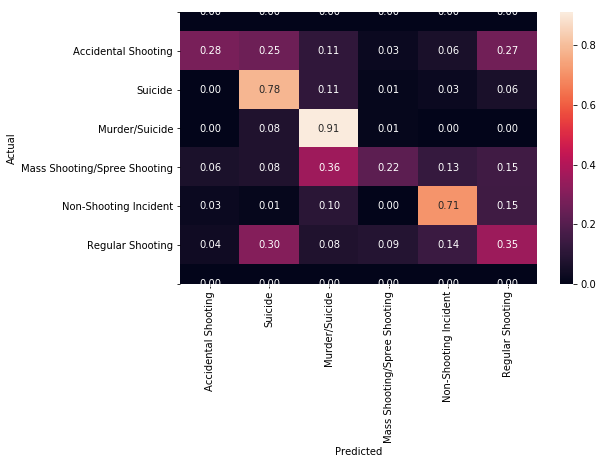

TRAIN: [3902  796 4130 ... 1290 2627 2530] TEST: [4335 1232 2934 4645 1012 2781  151 3335 1726  650  147 4176  395  227
 3156 2706  854 4603 3238 2420 3169 1364 3826 2999 2792 4359 3745 2107
 2662 1488 2773 2153 1340  905 3321 4209  960 3630 4531 1583 3947 3440
 2260 3909 2904 2002 4481  245 2799 4136  174 1512 1172 2957 3063 2452
 3726 3936 4424 1833 4049  497  872  571   15 4393 2090  366 4619 2819
  755 4540 2760 1940 1635 1125 3869 1858  177  411 3926 3304 4721  931
 4326 3381   14 2651 4574 1272 3629  112 4149 2730 1325 1818 4288 1357
 1266   36 2237 2915 2148 2994 3033 4633  561 3182 3631  307 2145 2835
  529 3734 1746 4179 1788 4422 1294 2448  772 3355 4274 2149 4511 3363
 2747  941 3421 3310 3297  738 1850  326  855 4052 1844 3997  578 3465
 1226 1080 4312 4400  175 1687 2935 2717 3834  646 1804 3383  752 3800
 4186  259 4709 3750 3489 1381  823 4524 2924 1832 2546 3174 2352 1111
  599 3357 3294  889 1754 1779 1998 3847 3903 1879 3250  418  537  155
 1706 3083 4087 3784 2537 40

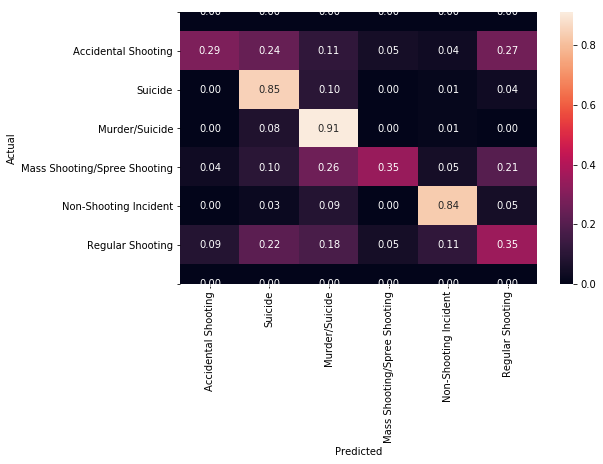

TRAIN: [4645 2469  207 ... 3585 1719 1066] TEST: [1694 3385  138 4061 2295 2814  569 1340 3451 1161 2622 3476 4166 2138
  870 2688 4701   37 1902 2496 1591  486 3860  812 3334 1055 2147  892
 4197  891 3120 4219 1059 2602  581 1731 3942  339  671 4184 3199 1012
 3904 3907 4726   35 1929 3868 3308  931  235  974 2289  780 1700 4332
 1104  390 4204 1117 4385 1010 1948 3758 1207 3412 2056 4129 3596 4208
 3608 2327 4542  453 2686  674 4078 4573 3574  176 3145 1546 2423 1053
 1924  574 4438 1048  990 1089 1773 3115 2522  461 3417 3411 2884 4144
 2543 2941 3755  936 3887 1803 3463 2052 3048 3884 1486 2601 4095 1751
  737 1941 4548  104 1883 3919 3101 4048 1230 2805  446 2270 4431 1466
   14 2524 3140  650 3498 2148 1094  412 2900   99  948 4276 2080 1872
 1837 2667 1015 3881 2867  124 3035 2007 3204  675 2111 1212 3824  934
  988 2938 4354 3428 1378 1471 4611  365 1562 2149  798 3368  173 3112
 2997 2171 2728 1240  508 2448 4519 3342 4708 1369 2827 3378 4323 2189
 4543 3337 1930 3121 4069 39

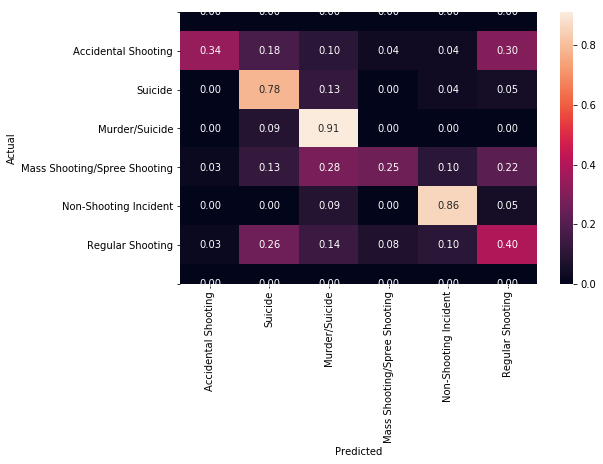

In [37]:
# Naive Bayes
import imblearn
from numpy import random
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit

bnb = BernoulliNB()

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.10, random_state=42)
sss.get_n_splits(design,target)

rus = RandomUnderSampler(sampling_strategy='auto',random_state=42)
design_s, target_s = rus.fit_resample(design.values, target.values)

parameters={'alpha':[i for i in range(500,5000,500)]}
clf=GridSearchCV(bnb,parameters)  
clf.fit(design_s,target_s)




for train_index, test_index in sss.split(design_s, target_s):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = design_s[train_index], design_s[test_index]
    y_train, y_test = target_s[train_index], target_s[test_index]
  
    clf.best_estimator_.fit(X_train,y_train)
    y_pred=clf.best_estimator_.predict(X_test)
    print(clf.best_estimator_.score(X_test,y_test))
    
    conf=confusion_matrix(y_test, y_pred, types)
    c = conf/conf.astype(np.float).sum(axis=1)[:, np.newaxis]
    dummy_row=np.zeros((6,))
    c = np.vstack([dummy_row,c,dummy_row])
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(c, annot=True, fmt='.2f', xticklabels=types, yticklabels=['']+types+[''])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)


TRAIN: [2245 1849 2538 ...  299  116 4472] TEST: [3829 3580 1020 1295 4443  614 2161 2483  504 1808 4362 3447 2333 1501
 1293 1036 3339 3323 2511  241  269 1596 1650 1582 1001 3224  699  205
 4124 1321  792 2042 2392 4317 2468 1614  161  566    1 3719 2574 2830
 3528  510 1513 3511 1090  700 4080 2030 2799 2113  790 2713  454  385
 3526  663 4590 3361 2464 4521 2091 3409 3174 1261 1479 2605 3931  815
 2279 3462 3258 1592 4321 3605  860 2049 3949 1044   87 2926 2460 4193
 4137 1173  769 3445 3725 4450 2988 3299 2715 1018  562  308 1832  372
 3508 1150 4499  413  476 1530 1732 2035 3691 4357 4051   13 4012 3986
  191  166 3232 2913 2771 3702 2406 3430 3531 4106 2986  201 3115 4282
  466 3977 1152 1853  427 2059 4211 3124  330  343 1878 3820  775 2114
 3656 4020  401 1817 3572 2788 4041 2590 2371 2754 2756  475 3809 1410
   21 2854  214 2282  474 1556 2583 2805 1517 3711 2450 3591 1738 3538
 1901 3122  795 2984 1771 4247 2442 2536 2944  273 2102 2683 2313 2321
 1311 2729 1026 2015 3756 37

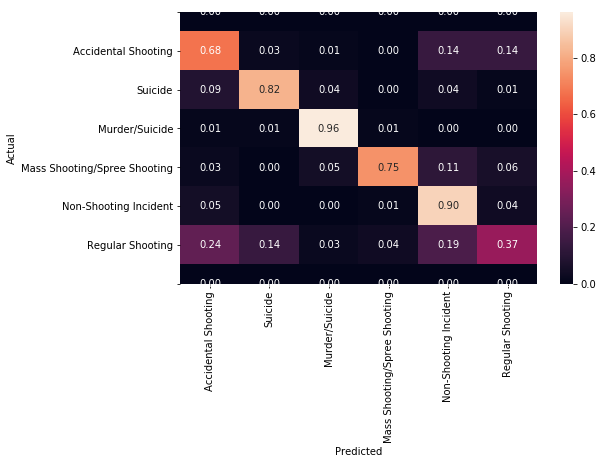

TRAIN: [1400 1053 4580 ... 1089 4088 3891] TEST: [ 378 4246 2289 4615 1072 2332 1373 4295 1895 1178 3305 1407 3516 3317
 3732   67 4434  524 3605 3356 3031  567 2065 4268 1474 1320 3325 2339
 4025 1293 1775 4700  358  146  526  113 3927   84  815 1771 4713 4469
 2226  557 2858 2265  537 1558  329  710 3284 2773  114 4487 1505  418
  508  877 3597 1809 3213 4403 2957  103 3244  305 1475 3070 4330  887
 1848 2770 3168 1986 3275 2078 2013 3010 3211  970 2865  127 1394 1174
 1811 3880 2947  916 3276 2043   52 4334  622 2975  178 1266 4163 2041
 2692 1171 1344 1854 4588 2778 2580 2691 3798 1670 2980  143  667 4315
 2250 3117  973 2315  349 2225 1258 4561 1019 2855 2015 4514 1254 3801
 3691 3872 2958  834 2069  275 1539  129 3530 2240 2622 3985 3459 3015
 2468 2108  585 1388 4312 1566 2629 1883 3150 1047 2694 2067 3216 1544
 1787 1596 3113 2355 4489 1575 2849  705 4214 2884 2080 2097 1818 3899
 1991 3945  913 1349 4263 4224 3833 1078 4567 3999  413 1356 3357  601
 1737  753 3120 3642 2619 29

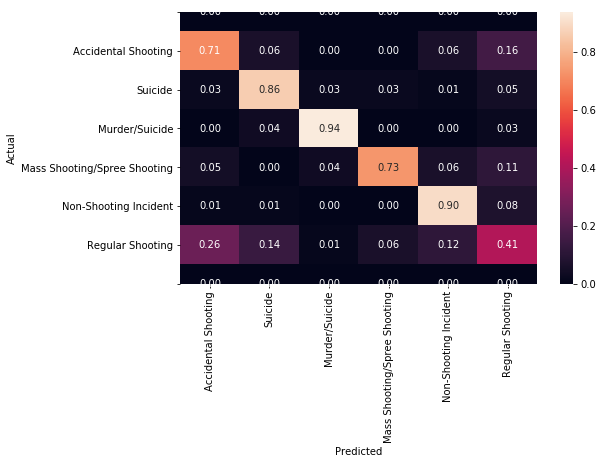

TRAIN: [1321  313 1571 ... 4073  461 2363] TEST: [ 431  998 2988 4091 2754 2089 1030 4059 4293 3712 3842 2580 1109  286
 1086 1063 2782 2712 2181  296  232 2269 1569 4243 2215 2893 3050 2507
 4535 3619  856  613 1849 2429 3560  474 1106 4309 3018 3758 1852 2351
 3119 1627 1017  293 1402 2401 1542 1445 4616 3507  794 1890  446 1080
 1069  640  864  532  407 3944  391  988 3016 2399  762 1297 3965 1374
 1339 1100  320 3686 1626 3999 1652  647 3374 4329 3481 1261 3819 2546
 4541 2531 3805  236 4210 1712   92  475 2336  181 3751 4489 2213 1148
 4303 2272 2520  680 3254   77 2405 4458 3180 1206 4008 1894 3389 3390
  482 4141 1952 1716 3086 2588 2964 1949  494  845 4021 1073 3937 1164
 2016 3874 2706 1382 2466 2549 1443 4621 1050 2025 3708 3417 1619 2986
 2763 3836 1794  117 3796 2192 3101 1265 3696 2333 3370 3761 2834 1507
 1358  611 1337 2661 1475 1908 1064 1207 2838 4042  252 3444 2324 1685
 4322 4334 4047 3175  932 4567 2438 2222 1853  142 3168 2018 1463 4095
 2156  357  563 1412 2497 47

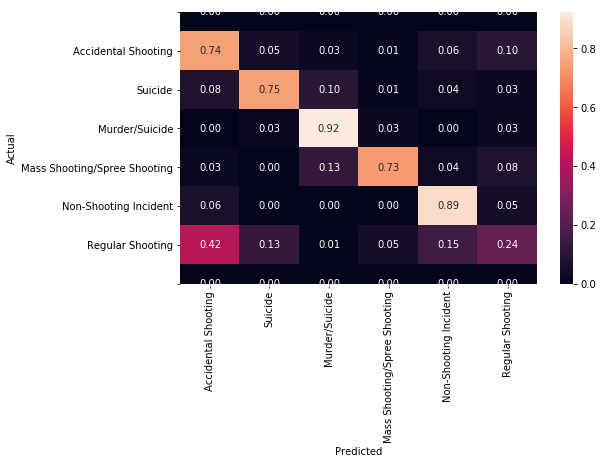

TRAIN: [  47  143 2103 ... 2593  673 3305] TEST: [3415 2488 3111 1632 1597 2384 2086  676 3917  768 1547 2591 2806 4659
 4271 3290 4043 4250 2743 2031 1345  273 1596 4423  159 3410 4505 3875
 1021 1955 4727 1757  528 3359 1209 3250 4301 1235  858 3185 3149 1511
  900  820 1315 3982 1552 2617 3829 2236  782 2252  188 1666  576 2945
 2855 2825 3370 3888 1715 1379  822 2163 2936 4234 3965 2260 1034  771
 2810 3146 4221 3985  351 4484 1246 4316 2271 4348 1507 1004 1882 2123
  205   35  721 2209  895 3891 4696 1461 2857 4642 1059 4263 2817 3332
 3662 4470  403 1401 4270 2206 3292 2608 2813 2787 4707 3972 1103 4438
  325 1828 1132  662 2567 1016 1648 4663  906 1165 1154 3382 2833 4675
 1932 3642 1771 1523  607 3842 1869 1419 3775 1242 3501 1908  414 2479
 2363  842 3611 3000 1063 2414  652 3777 3960  145 1284 4059 1197 3831
  554 1144  707 2725 3727 1874  694  729 2655 4182 2429 1415 3498 3631
 2520 1991  984 3374 1459 3936 3030  748  264 3128 4278 2692  887 3987
   58 3849 4704  130 2343  8

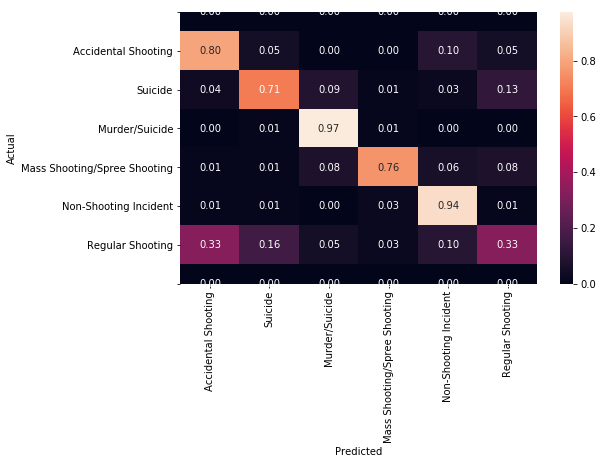

TRAIN: [ 739  470  237 ...  959 4258 3589] TEST: [ 306 2282 1937   52 2897  677 2114 4060 3093 3592 3601 4046 1639  399
  351  956 4145 3020  494 1227 3053 1732 2979 1974  522 1799 4161 3586
 3796 3870  269 4074 1041 4601 1586 3085 3418 3177 1807  241 3953  655
 3428  868 3285 1600  872 1649 3969  312 1117 3752 2725 2494  341 1562
  413 2972 2448   64  980 2906 1384 4006  242  508  922 2739  989 3979
 1641 2045 1454 3106 3655  209 3686 3762 1290  420 2718 2566 3644 1136
 3261 3231  704 1558   41 4526 3448 4612 4702 1908 3206 4593 2463 3727
 4672 2306 3695  589 2263 2867 1132 4329 2512 2312 4358 2710  450 2091
 4704  866 4596 1080 4725 2285 1654  854 1574 4693 1619  942 2571  632
 3758 3652 3460 2139  254 1303 2594 3576 4017 4686 1141 1896 2585   33
 3288  968 2206 1226 2147 1326 3851 1380 4002 2700 1349 3950 1980 3548
  112 2446 4332  952 2664 2733 4126  177 3419 1386 2641  337 3251 2572
  298 3463  876 3415 4562 2235 4513 1589 2839 1905 1635 2177  426  933
 1590 2778 3925  519 3114  2

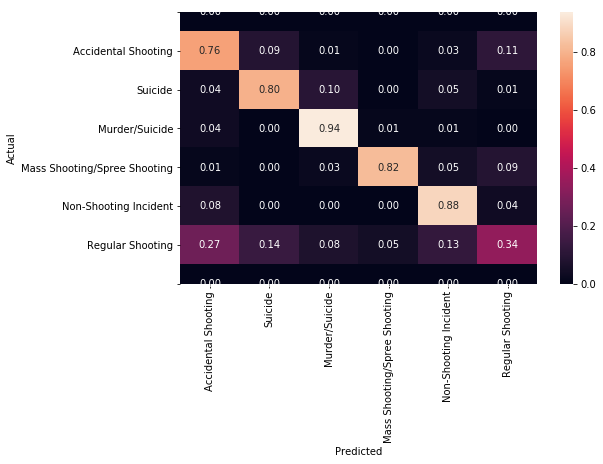

TRAIN: [2617  272 1380 ... 1689 1458 2327] TEST: [4123 3932  733  424 2251 1163 1692  661 1355 1682 1336 2660 2879  322
  509  547 2408 1245 4278  956 1626 4691 2946 3087  523 1543 1091 3317
 2067 2622 3130 4590 3996  682  775 1777 2509 4577  552 4559 1704 3048
 1038  995 1774 3153 2423 1791  116 4463 2478  732 2138  267 4203 2625
 1065 1272  581 4171 4211 4375  475 1140 3527 1897 3178   69 1005 3630
 3029   20 1307 4039 3234 4086 4068 3359 2192 3845  990 4564 3119 1459
 2731 1346 1737  129  938 3187 1879 1980 1086 2122 3633 1665  174 2336
 1029 3294  818 2144 2245 1987 3070 1866 2228 2066  165 2859 4336 2039
  207 1651  300 4398 4174  891  934 1945  558 3172 2857  213 1882 3295
 3034  919 1727 1896  483 2115 2911 3754 2902  728 4082 1103 2993 1695
  753 1942 3589 1143 3766 4474 3535 3713 1426 2331 1464  200 3151 3994
 4213 2784  102  118  579 3513 2073  408  347 2080 2842 1519 2168 1384
 3671 3196 4169  238 2624 3509 4537 1285 1740 2564 4417 3396 1931 3536
 1055 2950 3243  930 2065 14

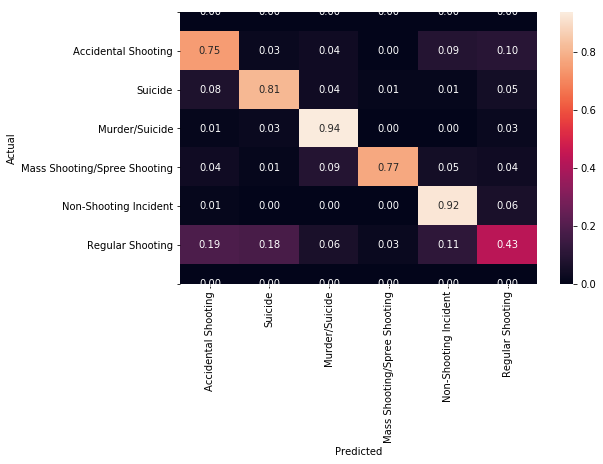

TRAIN: [ 812 3513 1600 ... 4217 1949 3072] TEST: [3719 4720 2126 4554  210 1391 3406 2019 3852 1652 1761 3282 1364  718
 2871 1787 4494 2346 2742 2289 4593  234 4346 1319 2724  598 3318 1851
 2376 4147 3835 3738 1988 2080 3226 4662 4395 1966 2218 1308   22 1107
 2818   44  386 1006 3234 3458 2992 3189 3497  217 4020 3076 2211 1071
 3810 1244  241 3095 1469 1691 1735 3396 1815 4083 4667  488 2463 2317
  630  850 3673 1331 4010  773 2077 4383 2597  900 3900 3858 1690 1537
 4166 3729 4325 1543 1398 4683  347 2819 3698 1242 1580  415 4005 2768
 4162 4516 1329 3782 1833 4252 2165 4698 4538 2993 3379 1956 3373 3933
  434 3420 4342  523 1082 2692 4180 1368 2170  226  608 1130 1387  481
 3395 1014 1354 1512 1373 4435 1940  380 2033 3125  407 2474  409 1407
 1539 2595  147  525 2183  839 2926 3486 1292 3657 3436  541  786 1633
 3407  940 2694 2774 2612 3337  143  199 3906 1843 1406 2467 3925  874
 2047 4201   57 1348 3291 1823 1143 4528    3 2494  761 3763 1882 2296
 1923 2014 2729  390 3360 21

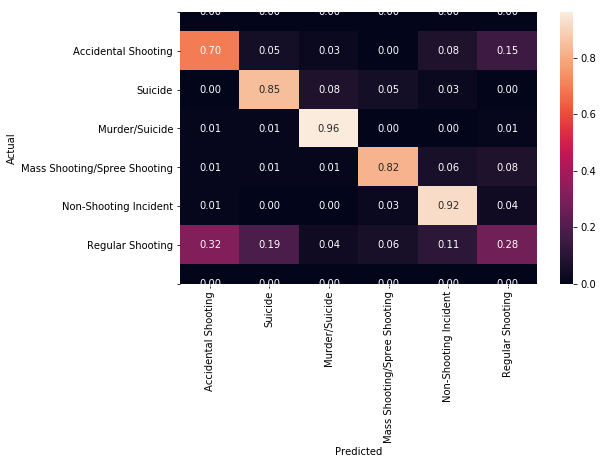

TRAIN: [ 230  259 3756 ... 2863 1244 2259] TEST: [ 772 4650 2017 3551 2031 2050 4194 1659 1811 4606 2979 4424 2558 1896
  674 2142 1873 3277 2366  996 3845 1688 4419 4024  989 3921 2289  704
 3375 2922 4595 3763 3559  609 1501 4082  680 4307 4045 3350 1577 2075
 4371 1890 3123 4527 4057 4486 1344  433 2087 1881  791 1822 3684 1053
 2078 1573 1262 1308 2358 3491 3993 2614  771 4138 3729 1627 3668 3080
 3771 2091 1689 2252 3424 2504 4270 2637 4398  405  976 2681 3823 3532
  144 3567 2695 1633 4220  839 4310 3291 3664 3402  689  173 1674 2844
  345 3380 2327 1432 2715  860 1779 1099 1028 3554  277 3077 1485 3057
 3043 3972 1253 2770  421 2285 4552 2265 2535 2269  586 1843 1329  154
  152  249 3840 3912 2966  657 1849 1815  353 1415 2956 3134  894 2833
 1020 2377 1003 4551  438 1907  211  909 3422 4225  441  568 3206  180
 1241 2641 1928  947 1940  352 4661 1484 3407 2024 1840 4593 4091  476
  195  886  392  739 1875 1637 2771 2591  550 3102  911 1045  490 3922
 1320 2362 3557  348 2277 36

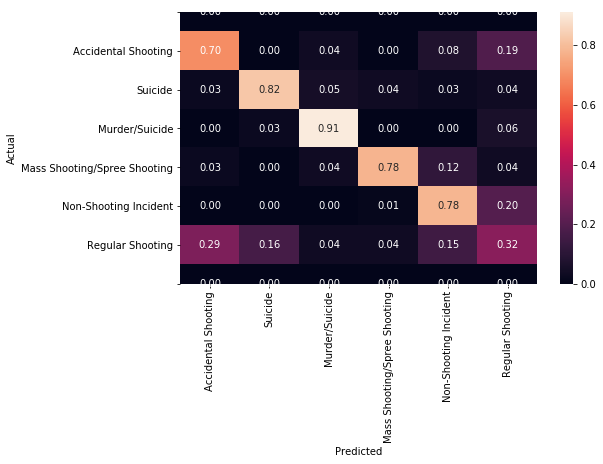

TRAIN: [3902  796 4130 ... 1290 2627 2530] TEST: [4335 1232 2934 4645 1012 2781  151 3335 1726  650  147 4176  395  227
 3156 2706  854 4603 3238 2420 3169 1364 3826 2999 2792 4359 3745 2107
 2662 1488 2773 2153 1340  905 3321 4209  960 3630 4531 1583 3947 3440
 2260 3909 2904 2002 4481  245 2799 4136  174 1512 1172 2957 3063 2452
 3726 3936 4424 1833 4049  497  872  571   15 4393 2090  366 4619 2819
  755 4540 2760 1940 1635 1125 3869 1858  177  411 3926 3304 4721  931
 4326 3381   14 2651 4574 1272 3629  112 4149 2730 1325 1818 4288 1357
 1266   36 2237 2915 2148 2994 3033 4633  561 3182 3631  307 2145 2835
  529 3734 1746 4179 1788 4422 1294 2448  772 3355 4274 2149 4511 3363
 2747  941 3421 3310 3297  738 1850  326  855 4052 1844 3997  578 3465
 1226 1080 4312 4400  175 1687 2935 2717 3834  646 1804 3383  752 3800
 4186  259 4709 3750 3489 1381  823 4524 2924 1832 2546 3174 2352 1111
  599 3357 3294  889 1754 1779 1998 3847 3903 1879 3250  418  537  155
 1706 3083 4087 3784 2537 40

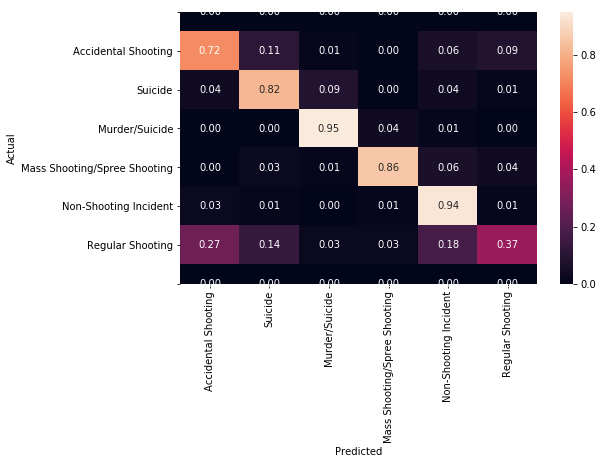

TRAIN: [4645 2469  207 ... 3585 1719 1066] TEST: [1694 3385  138 4061 2295 2814  569 1340 3451 1161 2622 3476 4166 2138
  870 2688 4701   37 1902 2496 1591  486 3860  812 3334 1055 2147  892
 4197  891 3120 4219 1059 2602  581 1731 3942  339  671 4184 3199 1012
 3904 3907 4726   35 1929 3868 3308  931  235  974 2289  780 1700 4332
 1104  390 4204 1117 4385 1010 1948 3758 1207 3412 2056 4129 3596 4208
 3608 2327 4542  453 2686  674 4078 4573 3574  176 3145 1546 2423 1053
 1924  574 4438 1048  990 1089 1773 3115 2522  461 3417 3411 2884 4144
 2543 2941 3755  936 3887 1803 3463 2052 3048 3884 1486 2601 4095 1751
  737 1941 4548  104 1883 3919 3101 4048 1230 2805  446 2270 4431 1466
   14 2524 3140  650 3498 2148 1094  412 2900   99  948 4276 2080 1872
 1837 2667 1015 3881 2867  124 3035 2007 3204  675 2111 1212 3824  934
  988 2938 4354 3428 1378 1471 4611  365 1562 2149  798 3368  173 3112
 2997 2171 2728 1240  508 2448 4519 3342 4708 1369 2827 3378 4323 2189
 4543 3337 1930 3121 4069 39

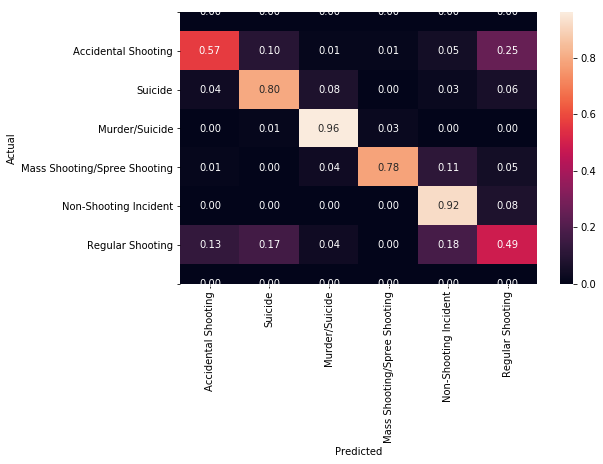

In [39]:
# KNN
import imblearn
from numpy import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.10, random_state=42)
sss.get_n_splits(design,target)

neigh = KNeighborsClassifier()

rus = RandomUnderSampler(sampling_strategy='auto',random_state=42)
design_s, target_s = rus.fit_resample(design.values, target.values)

parameters={'n_neighbors':[i for i in range(5,10,1)]}
clf=GridSearchCV(neigh,parameters)  
clf.fit(design_s,target_s)

for train_index, test_index in sss.split(design_s, target_s):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = design_s[train_index], design_s[test_index]
    y_train, y_test = target_s[train_index], target_s[test_index]
  
    clf.best_estimator_.fit(X_train,y_train)
    y_pred=clf.best_estimator_.predict(X_test)
    print(clf.best_estimator_.score(X_test,y_test))
    
    conf=confusion_matrix(y_test, y_pred, types)
    c = conf/conf.astype(np.float).sum(axis=1)[:, np.newaxis]
    dummy_row=np.zeros((6,))
    c = np.vstack([dummy_row,c,dummy_row])
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(c, annot=True, fmt='.2f', xticklabels=types, yticklabels=['']+types+[''])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

